In [561]:
# import sys 

In [562]:
# !{sys.executable} -m pip install --user cleverminer==0.0.82

In [563]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cleverminer
from cleverminer.cleverminer import cleverminer

In [564]:
df = pd.read_csv(('germany_housing_data_14.07.2020.csv'), index_col=0)

In [565]:
# first 5 rows
df.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


In [566]:
# types of columns
df.dtypes

Price                      float64
Type                        object
Living_space               float64
Lot                        float64
Usable_area                float64
Free_of_Relation            object
Rooms                      float64
Bedrooms                   float64
Bathrooms                  float64
Floors                     float64
Year_built                 float64
Furnishing_quality          object
Year_renovated             float64
Condition                   object
Heating                     object
Energy_source               object
Energy_certificate          object
Energy_certificate_type     object
Energy_consumption         float64
Energy_efficiency_class     object
State                       object
City                        object
Place                       object
Garages                    float64
Garagetype                  object
dtype: object

In [567]:
# rows & columns
df.shape

(10552, 25)

In [568]:
# missing values
df.isna().sum()

Price                         0
Type                        402
Living_space                  0
Lot                           0
Usable_area                4984
Free_of_Relation           3569
Rooms                         0
Bedrooms                   3674
Bathrooms                  1801
Floors                     2664
Year_built                  694
Furnishing_quality         2726
Year_renovated             5203
Condition                   323
Heating                     584
Energy_source              1227
Energy_certificate          755
Energy_certificate_type    3526
Energy_consumption         8119
Energy_efficiency_class    4819
State                         1
City                          1
Place                       290
Garages                    1960
Garagetype                 1960
dtype: int64

In [569]:
# basic statistics on all columns
display(df.describe())

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
count,1.055200e+04,10552.000000,10552.000000,5568.000000,10552.000000,6878.000000,8751.000000,7888.000000,9858.000000,5349.000000,2433.000000,8592.000000
mean,5.566851e+05,216.721008,1491.659004,134.300424,7.388978,4.169817,2.308993,2.283976,1958.821465,2010.706300,117.663111,2.698673
std,6.087410e+05,172.421321,8582.361675,188.814089,5.378126,2.577169,1.742330,0.821288,55.958072,10.548651,54.023207,3.195068
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1300.000000,1900.000000,5.100000,1.000000
25%,2.500000e+05,130.000000,370.000000,48.000000,5.000000,3.000000,1.000000,2.000000,1935.000000,2006.000000,83.170000,1.000000
50%,4.052150e+05,176.775000,656.500000,80.000000,6.000000,4.000000,2.000000,2.000000,1971.000000,2015.000000,112.700000,2.000000
75%,6.550000e+05,250.000000,1047.000000,150.250000,8.000000,5.000000,3.000000,3.000000,1996.000000,2018.000000,146.000000,3.000000
max,1.300000e+07,5600.000000,547087.000000,4034.000000,170.000000,61.000000,44.000000,13.000000,2022.000000,2206.000000,503.940000,70.000000


## Atributes

In [570]:
colorblind_palette = sns.color_palette("colorblind")
sns.set(context='notebook', style='white', palette=colorblind_palette, 
        font='sans-serif', font_scale=1.5, color_codes=False)

### Type

<AxesSubplot:title={'center':'Type'}, xlabel='Type', ylabel='count'>

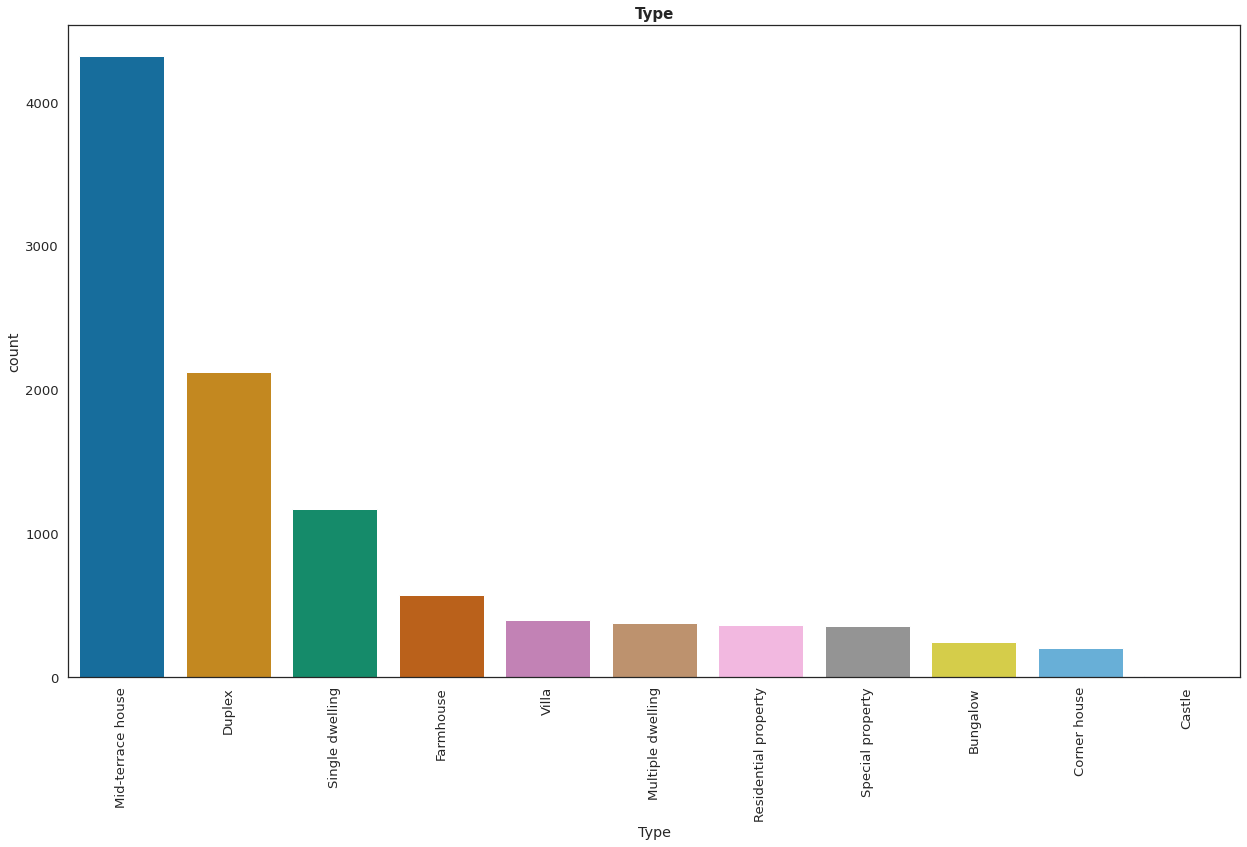

In [617]:
# the most used types
plt.figure(figsize=(21,12)) 
plt.xticks(rotation=90)
plt.title('Type', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Type'], data=df, palette=colorblind_palette, order=df['Type'].value_counts().iloc[-20:].index)

### Price

<AxesSubplot:title={'center':'Price'}, xlabel='Price'>

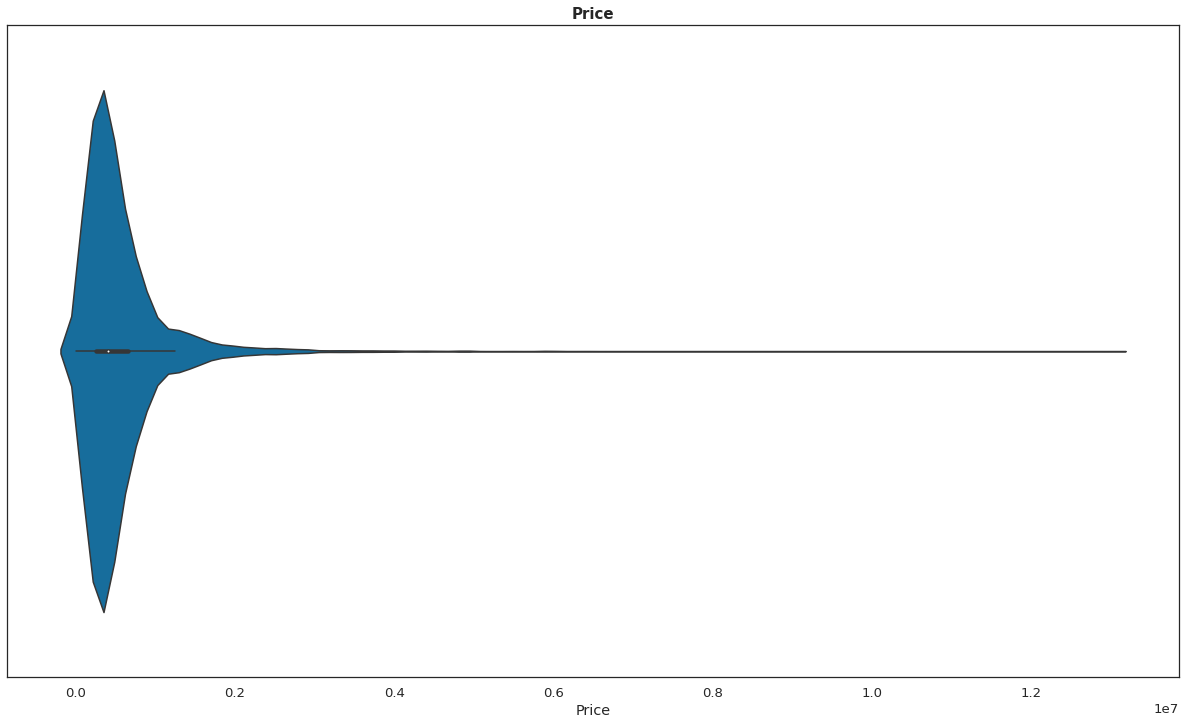

In [572]:
# plot price
plt.figure(figsize=(21,12)) 
plt.title('Price', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Price'], palette=colorblind_palette)

In [573]:
# lowest price
df['Price'].loc[~df['Price'].isnull()].iloc[0]

498000.0

In [574]:
# average price
df['Price'].mean()

556685.0867162624

In [575]:
# highest price
df['Price'].max()

13000000.0

In [576]:
# make equifrequent categories
price_intervals = ['up to 300k', '300-550k', '550k+']
price_ef = pd.qcut(df['Price'], 3, precision=0, labels=price_intervals)

<AxesSubplot:title={'center':'Price Equifrequent categories'}, xlabel='Price', ylabel='count'>

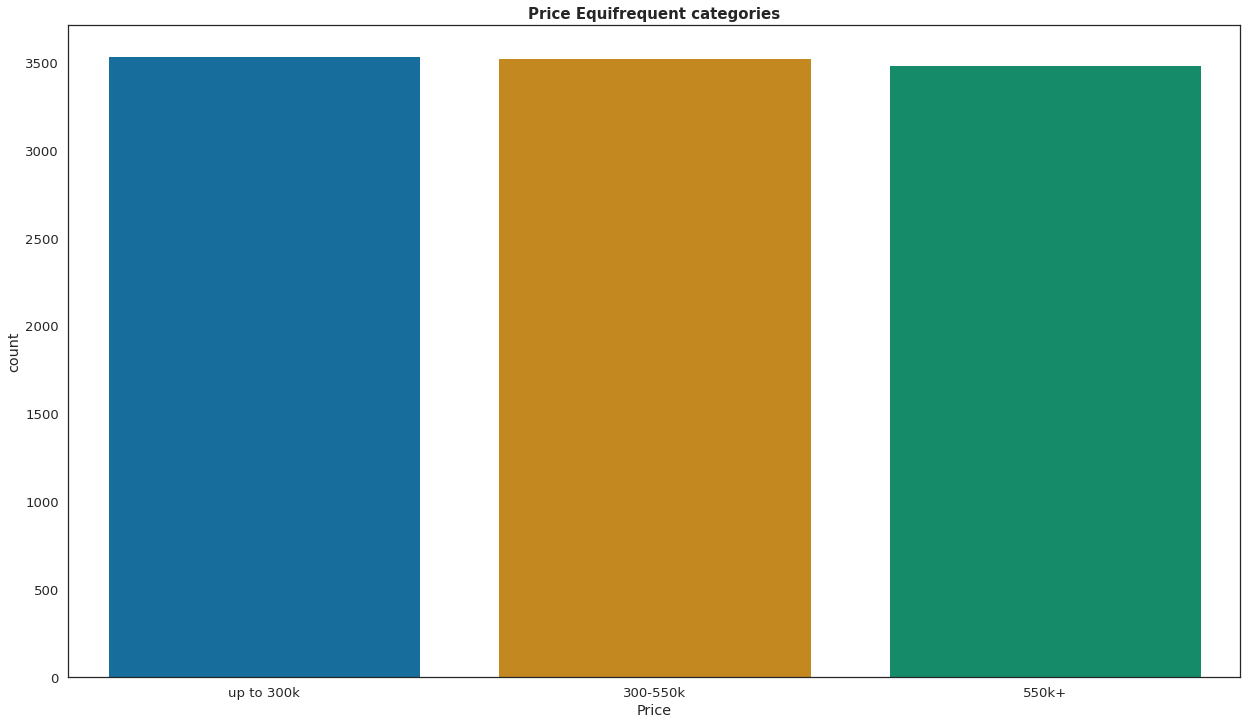

In [577]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Price Equifrequent categories', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=price_ef, data=df, palette=colorblind_palette)

### Living Space

<AxesSubplot:title={'center':'Living Space'}, xlabel='Living_space'>

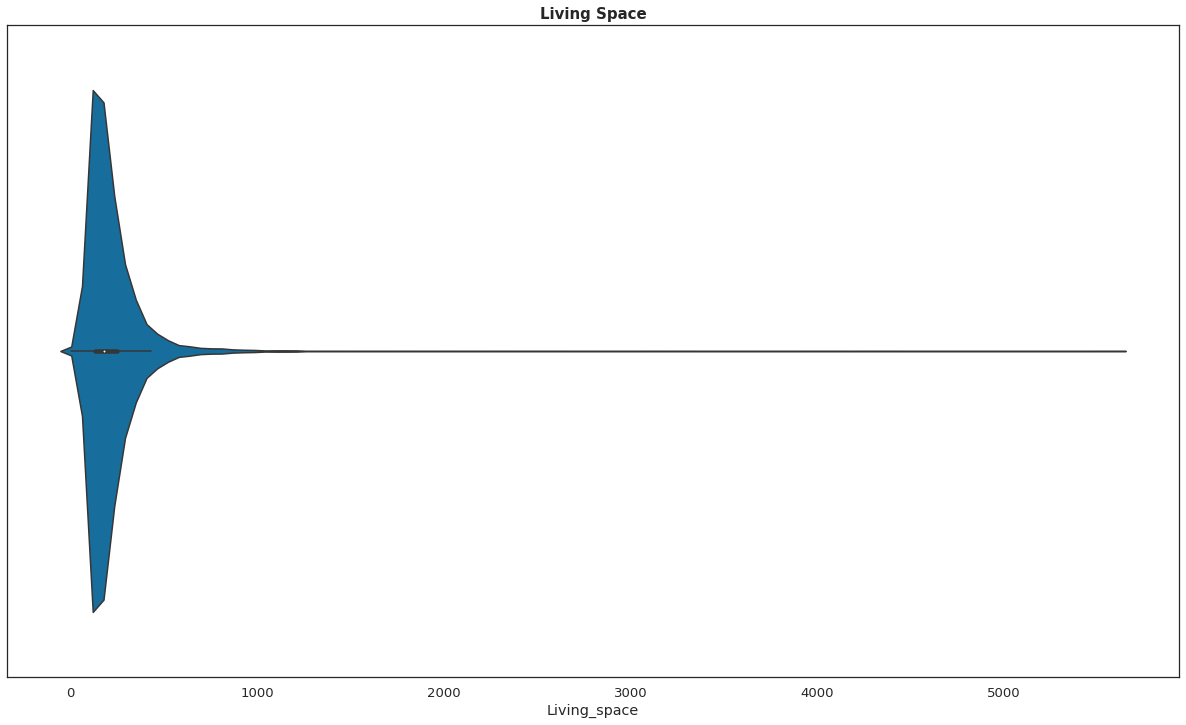

In [578]:
# plot living space 
plt.figure(figsize=(21,12)) 
plt.title('Living Space', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Living_space'], palette=colorblind_palette)

In [579]:
# average living space
df['Living_space'].mean()

216.72100833965087

In [580]:
# make equidistant & equifrequent categories
living_space_ef = pd.qcut(df['Living_space'], 5, precision=0)

<AxesSubplot:title={'center':'Living Space Equifrequent'}, xlabel='Living_space', ylabel='count'>

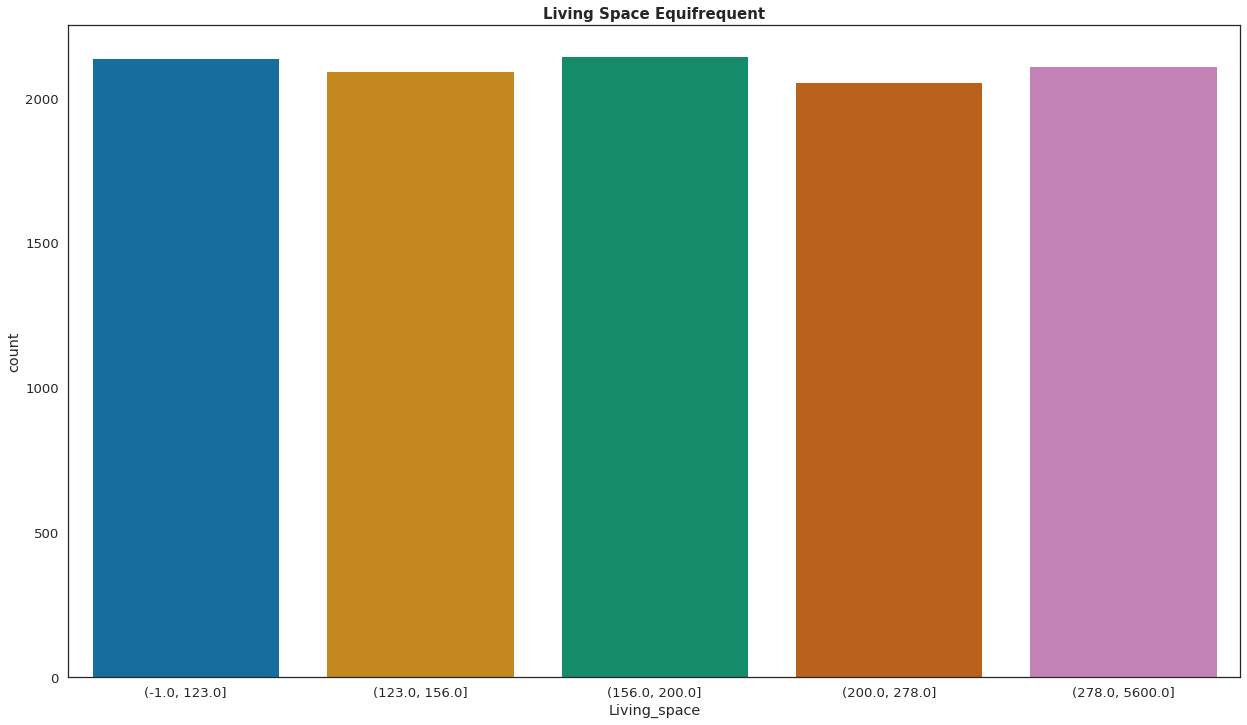

In [581]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Living Space Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=living_space_ef, data=df, palette=colorblind_palette)

### Lot

<AxesSubplot:title={'center':'Lot'}, xlabel='Lot'>

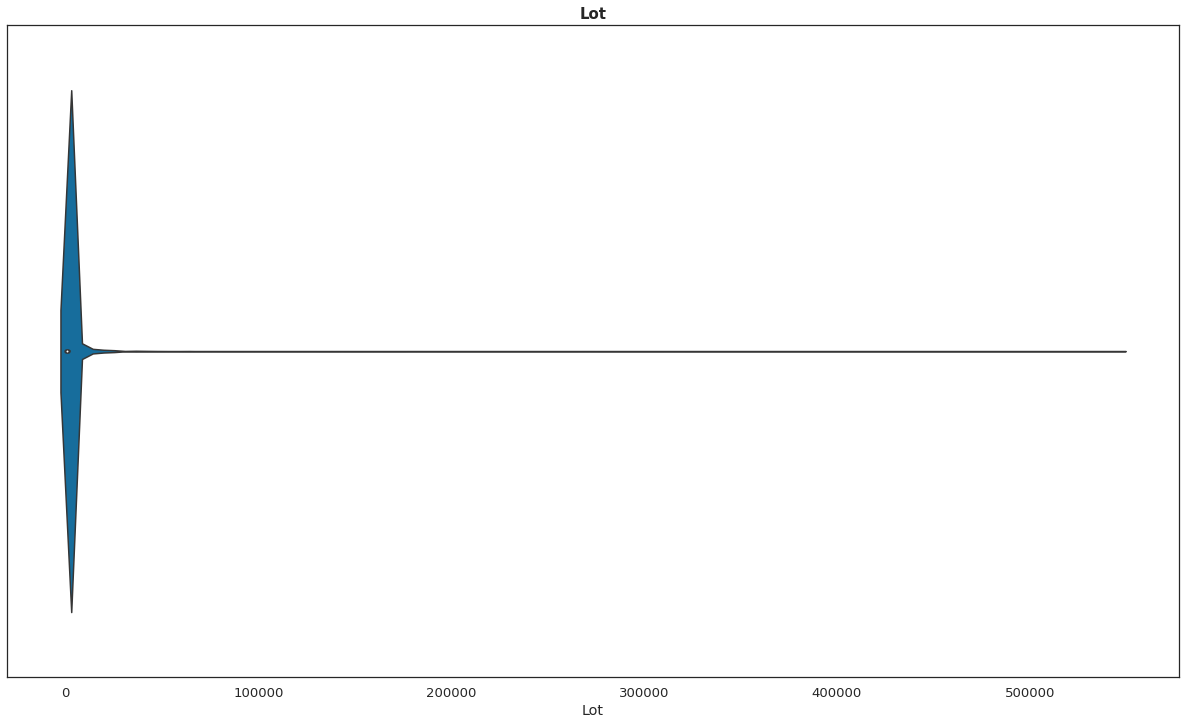

In [582]:
# plot lot area
plt.figure(figsize=(21,12)) 
plt.title('Lot', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Lot'], palette=colorblind_palette)

In [583]:
# make equifrequent categories
lot_ef = pd.qcut(df['Lot'], 5, precision=0)

<AxesSubplot:title={'center':'Lot Equifrequent'}, xlabel='Lot', ylabel='count'>

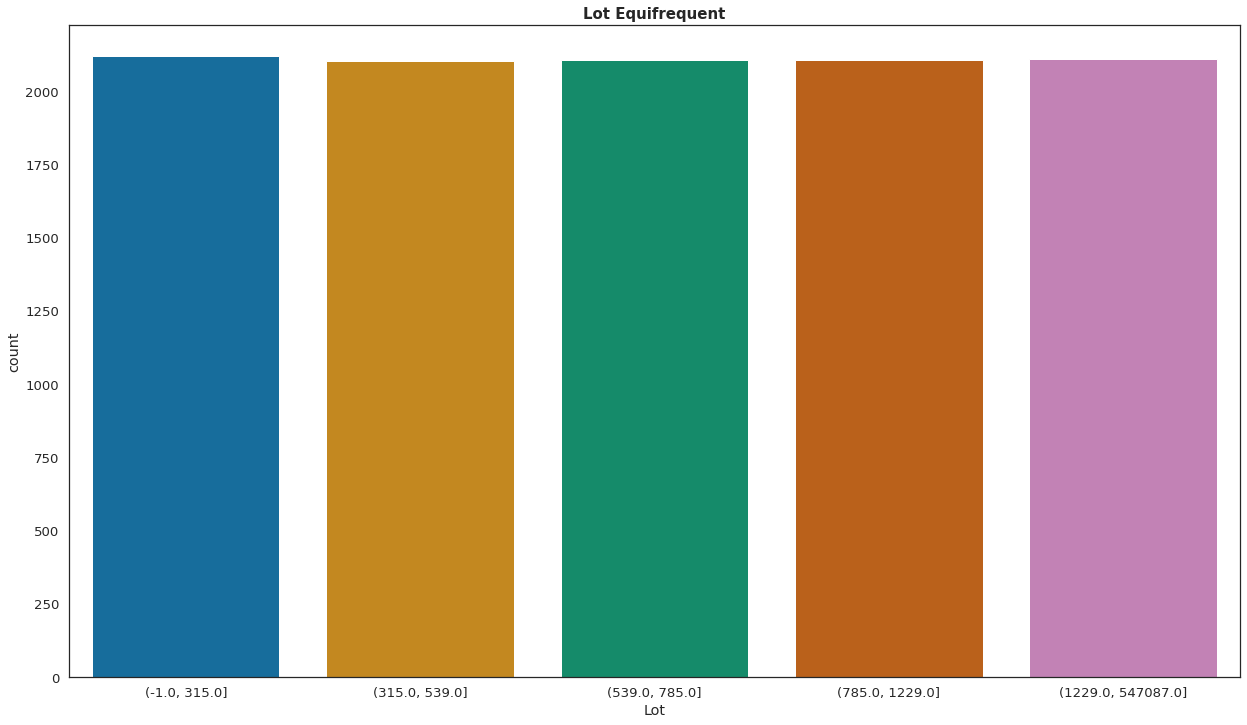

In [584]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Lot Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=lot_ef, data=df, palette=colorblind_palette)

### Usable area 

<AxesSubplot:title={'center':'Usable area'}, xlabel='Usable_area'>

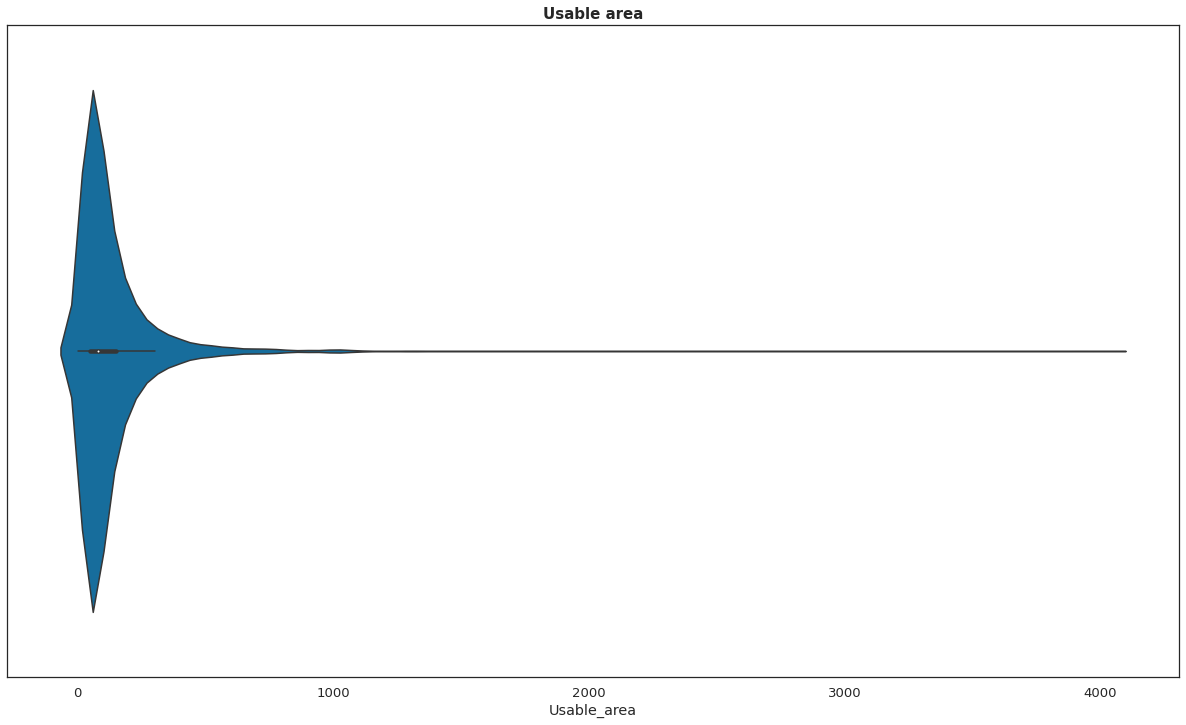

In [585]:
# plot usable area
plt.figure(figsize=(21,12)) 
plt.title('Usable area', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Usable_area'], palette=colorblind_palette)

In [586]:
# make equidistant & equifrequent categories
usable_area_ef = pd.qcut(df['Usable_area'], 5, precision=0)

<AxesSubplot:title={'center':'Usable area Equifrequent'}, xlabel='Usable_area', ylabel='count'>

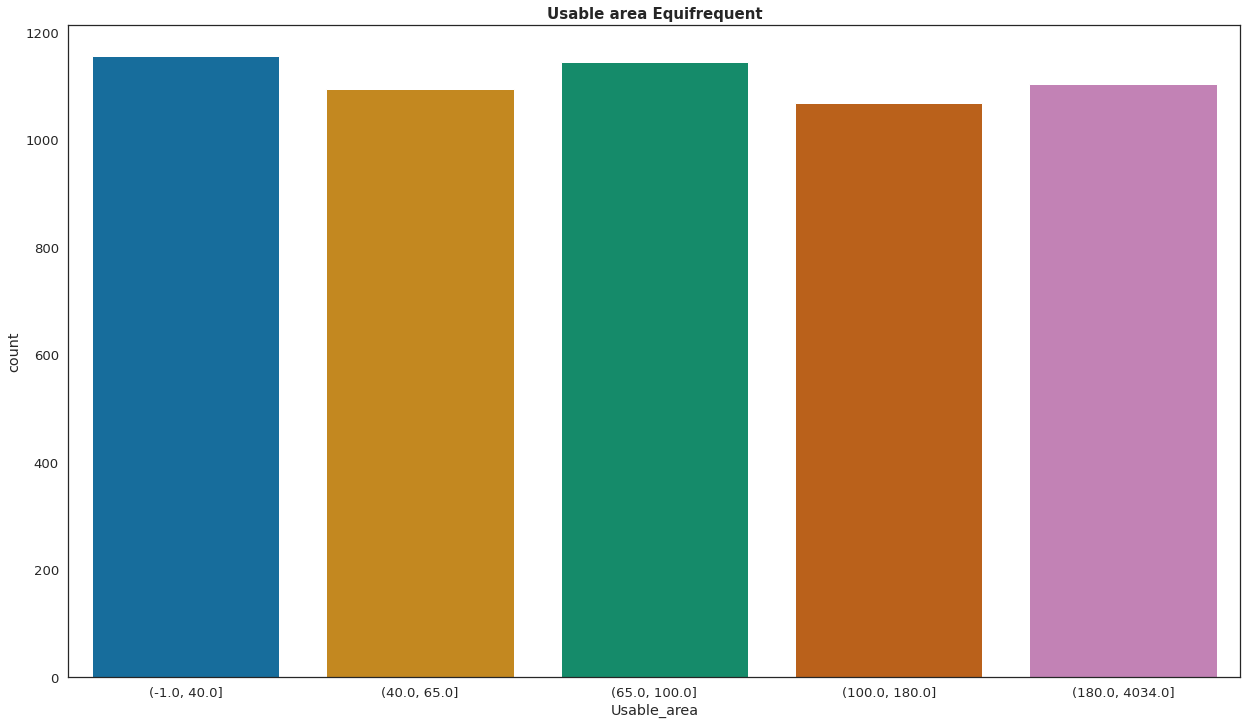

In [587]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Usable area Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=usable_area_ef, data=df, palette=colorblind_palette)

### Free_of_Relation

<AxesSubplot:title={'center':'Free Of Relation'}, xlabel='Free_of_Relation', ylabel='count'>

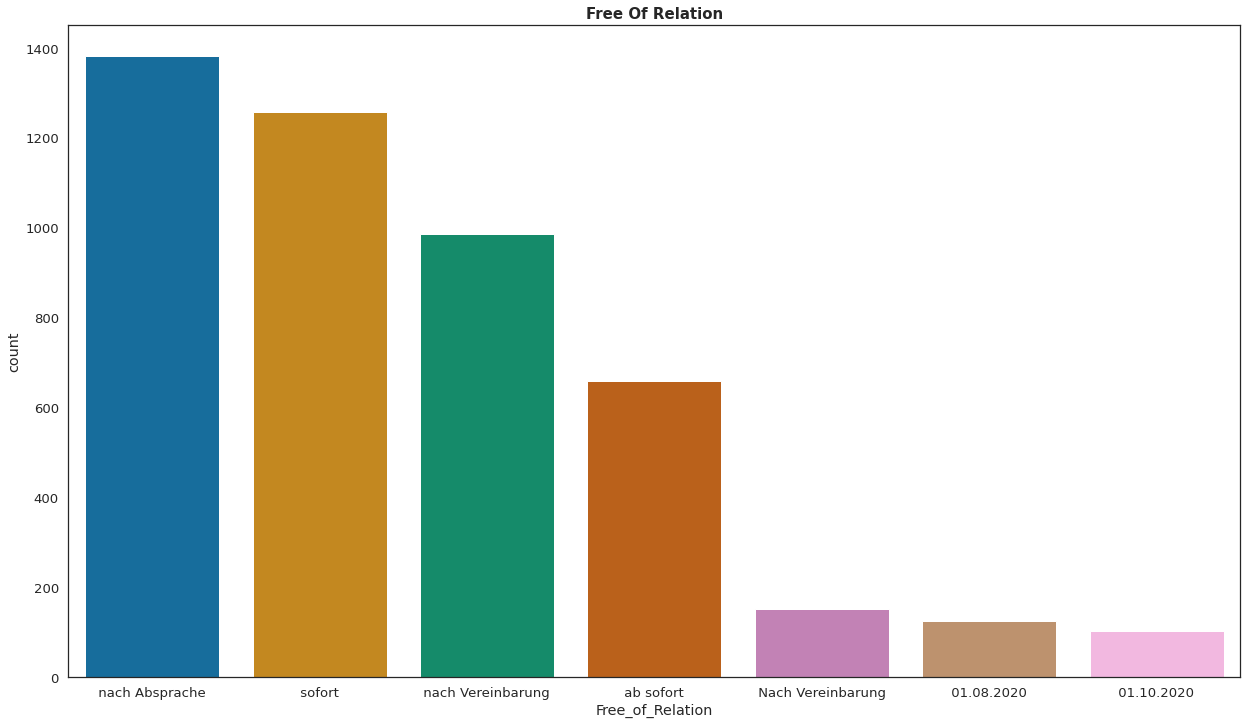

In [588]:
# availability - the first 7 commonly used dates from which flat is available
plt.figure(figsize=(21,12)) 
plt.title('Free Of Relation', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Free_of_Relation'], data=df, palette=colorblind_palette, order=df['Free_of_Relation'].value_counts().iloc[:7].index)

### Rooms

<AxesSubplot:title={'center':'Rooms'}, xlabel='Rooms'>

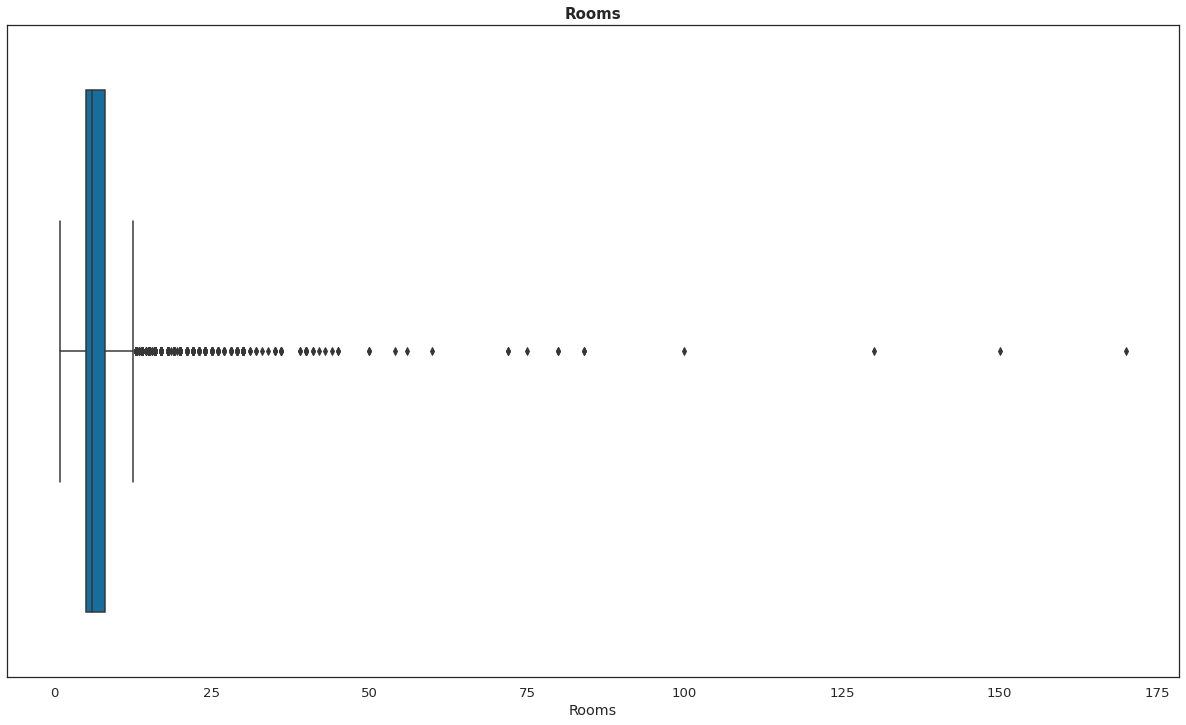

In [589]:
# the most common amount of rooms
plt.figure(figsize=(21,12)) 
plt.title('Rooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Rooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Rooms'}, xlabel='Rooms', ylabel='count'>

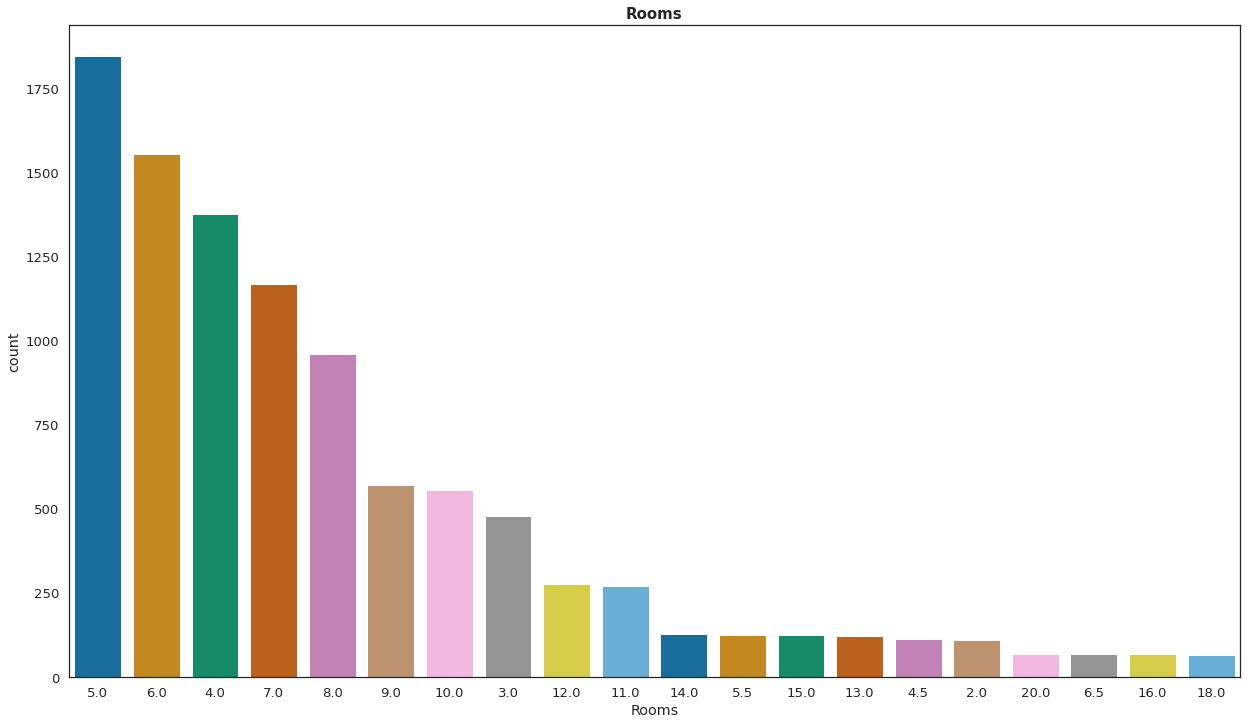

In [590]:
# the most common amount of rooms - first 20 records
plt.figure(figsize=(21,12)) 
plt.title('Rooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Rooms'], palette=colorblind_palette, order=df['Rooms'].value_counts().iloc[:20].index)

### Bedrooms

<AxesSubplot:title={'center':'Bedrooms'}, xlabel='Bedrooms'>

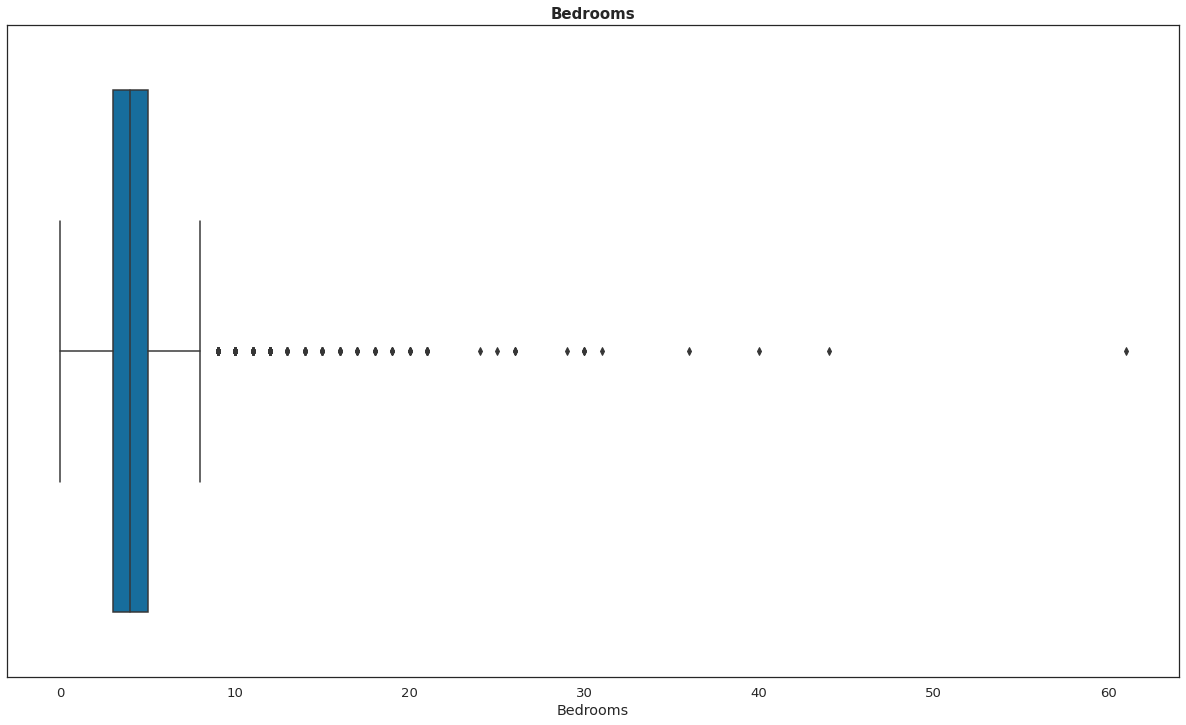

In [591]:
# the most common amount of bedrooms
plt.figure(figsize=(21,12)) 
plt.title('Bedrooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Bedrooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Bedrooms'}, xlabel='Bedrooms', ylabel='count'>

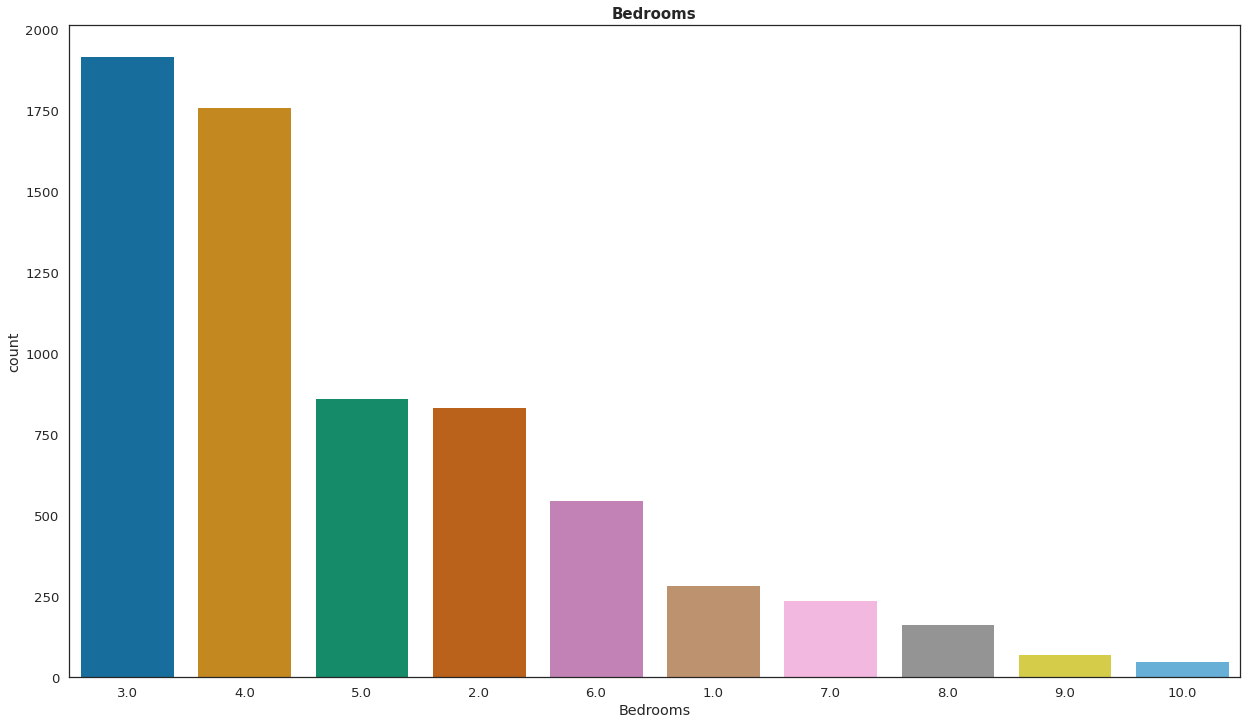

In [592]:
# the most common amount of bedrooms - first 10 records
plt.figure(figsize=(21,12)) 
plt.title('Bedrooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Bedrooms'], palette=colorblind_palette, order=df['Bedrooms'].value_counts().iloc[:10].index)

### Bathrooms

<AxesSubplot:title={'center':'Bathrooms'}, xlabel='Bathrooms'>

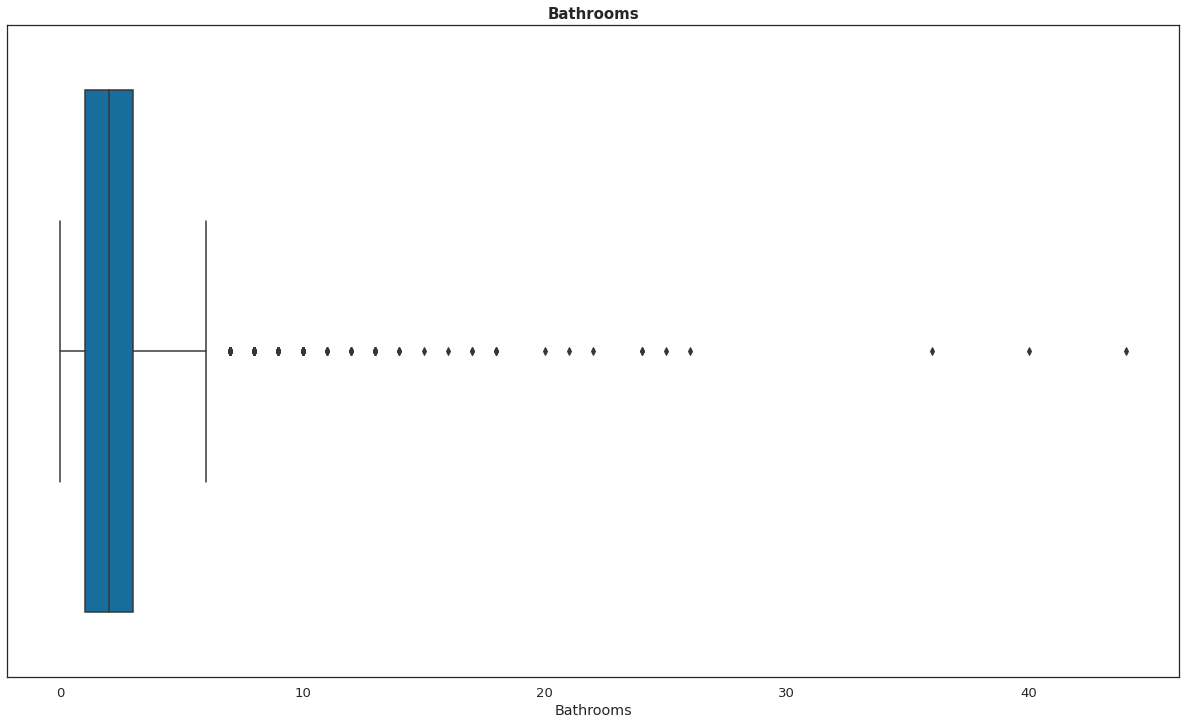

In [593]:
# the most common amount of bathrooms
plt.figure(figsize=(21,12)) 
plt.title('Bathrooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Bathrooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Bathrooms'}, xlabel='Bathrooms', ylabel='count'>

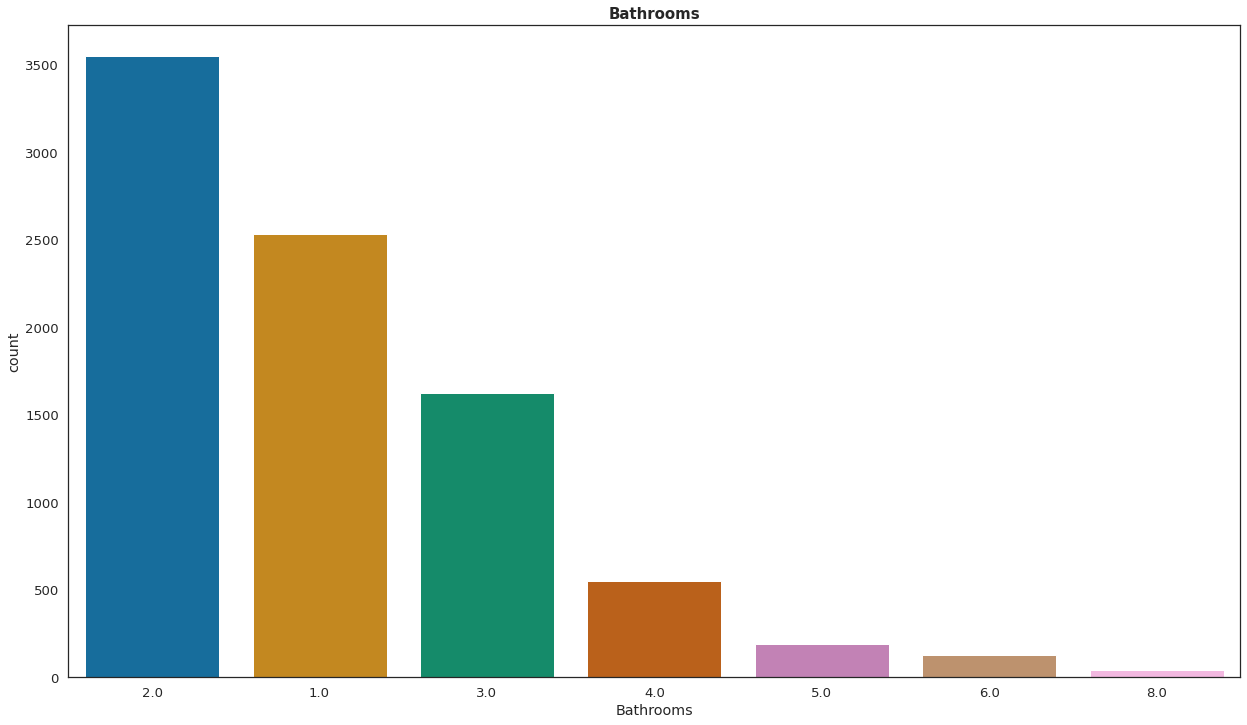

In [594]:
# the most common amount of bathrooms - first 7 records
plt.figure(figsize=(21,12)) 
plt.title('Bathrooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Bathrooms'], palette=colorblind_palette, order=df['Bathrooms'].value_counts().iloc[:7].index)

### Floors

<AxesSubplot:title={'center':'Floors'}, xlabel='Floors', ylabel='count'>

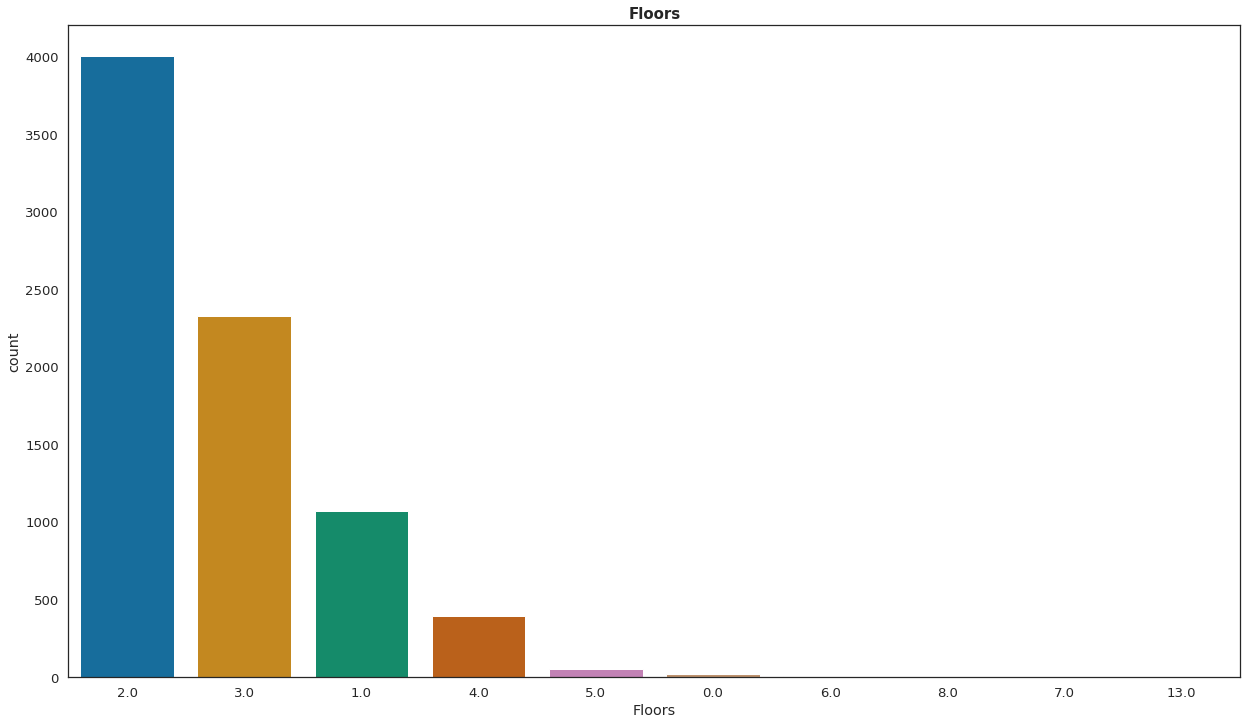

In [595]:
# all floors
plt.figure(figsize=(21,12)) 
plt.title('Floors', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Floors'], data=df, palette=colorblind_palette, order=df['Floors'].value_counts().iloc[:].index)

### Year built

<AxesSubplot:title={'center':'Year Built'}, xlabel='Year_built'>

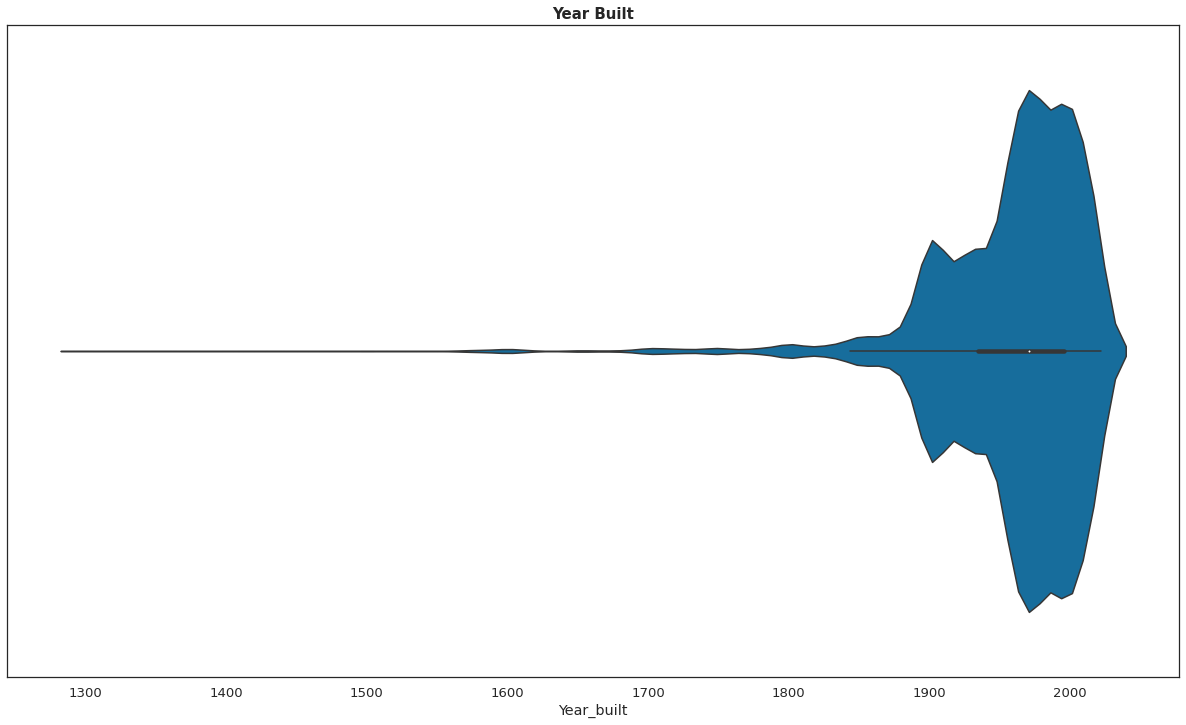

In [596]:
# plot year built
plt.figure(figsize=(21,12)) 
plt.title('Year Built', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Year_built'], palette=colorblind_palette)

AttributeError: 'Text' object has no property 'astype'

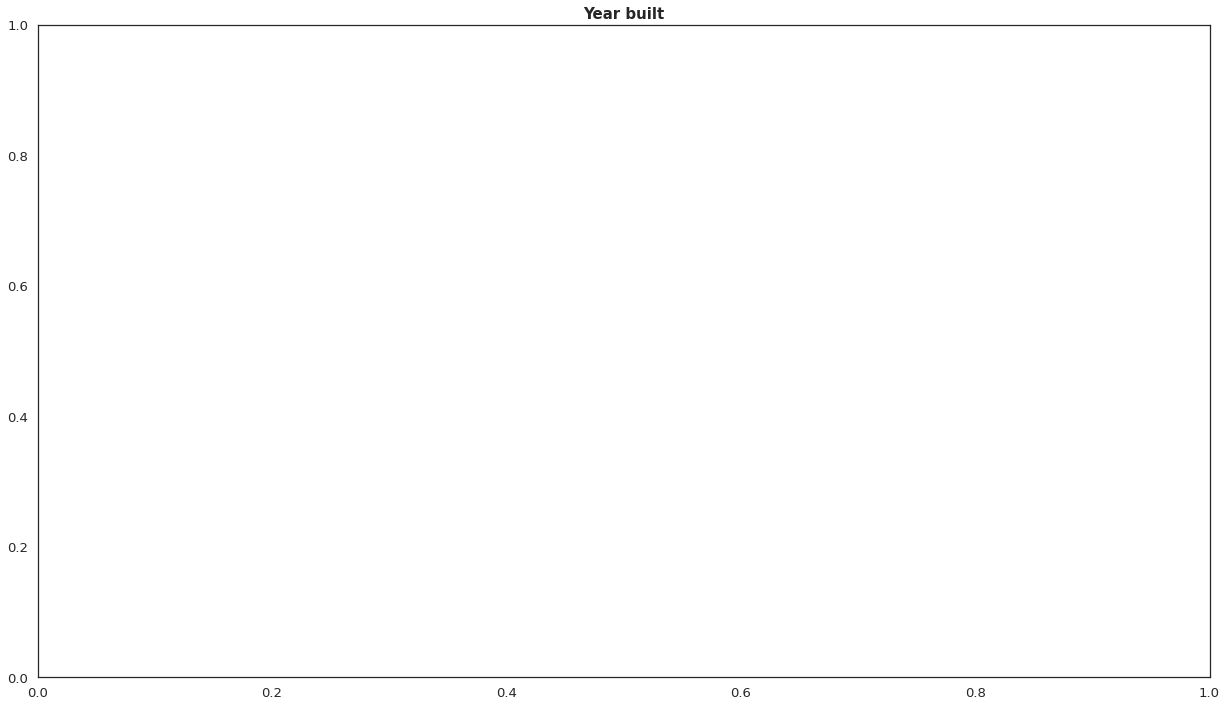

In [624]:
# plot year built - first 15
plt.figure(figsize=(21,12)) 
plt.title('Year built', fontsize=15, fontweight='bold', ha='center')
plt.xticks(astype=int, rotation=90)
sns.countplot(x=df['Year_built'], palette=colorblind_palette, order=df['Year_built'].value_counts().iloc[:15].index)

### Furnishing_quality

<AxesSubplot:title={'center':'Furnishing quality'}, xlabel='Furnishing_quality', ylabel='count'>

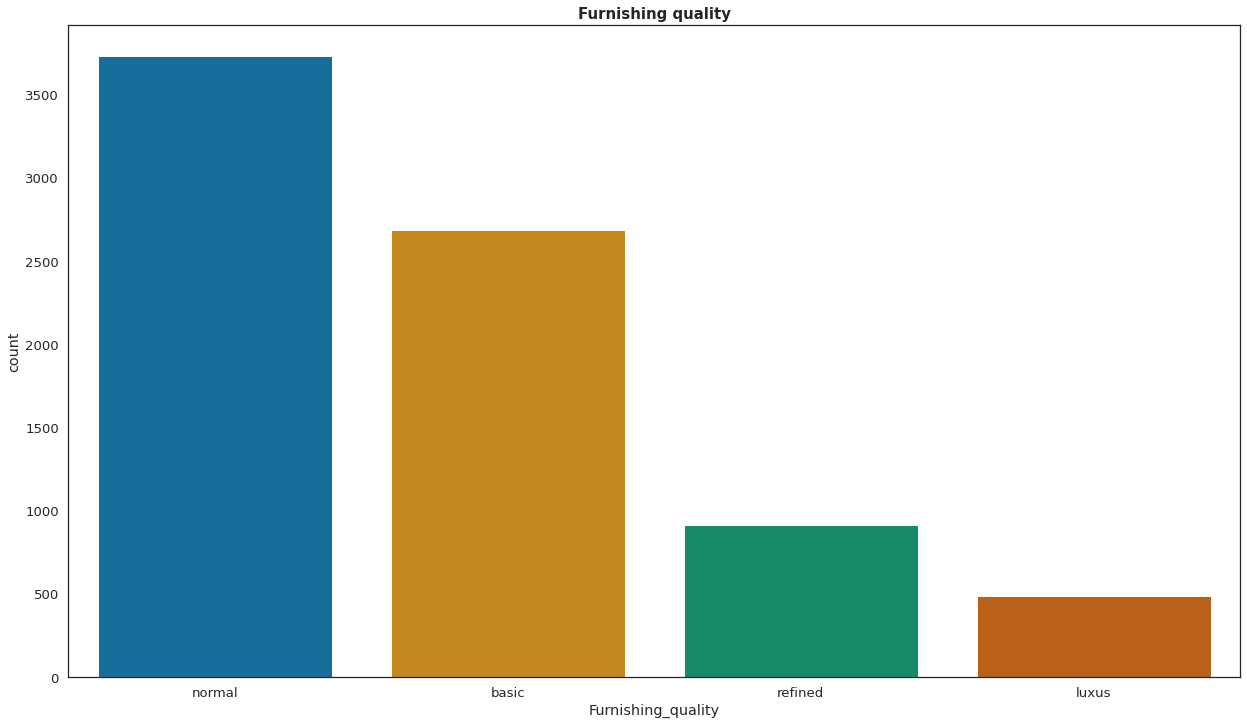

In [598]:
# the most used types
plt.figure(figsize=(21,12)) 
plt.title('Furnishing quality', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Furnishing_quality'], data=df, palette=colorblind_palette)

### Year_renovated

<AxesSubplot:title={'center':'Year Built'}, xlabel='Year_built'>

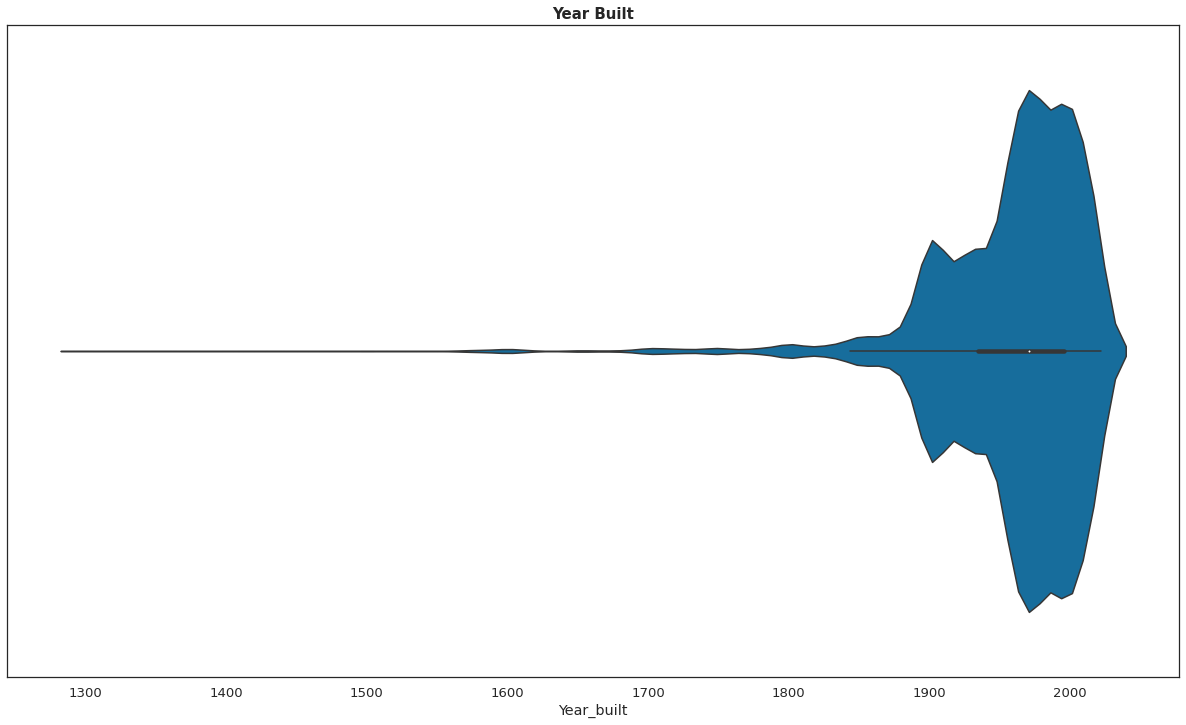

In [599]:
# plot year renovated
plt.figure(figsize=(21,12)) 
plt.title('Year Built', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Year_built'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Year renovated'}, xlabel='Year_renovated', ylabel='count'>

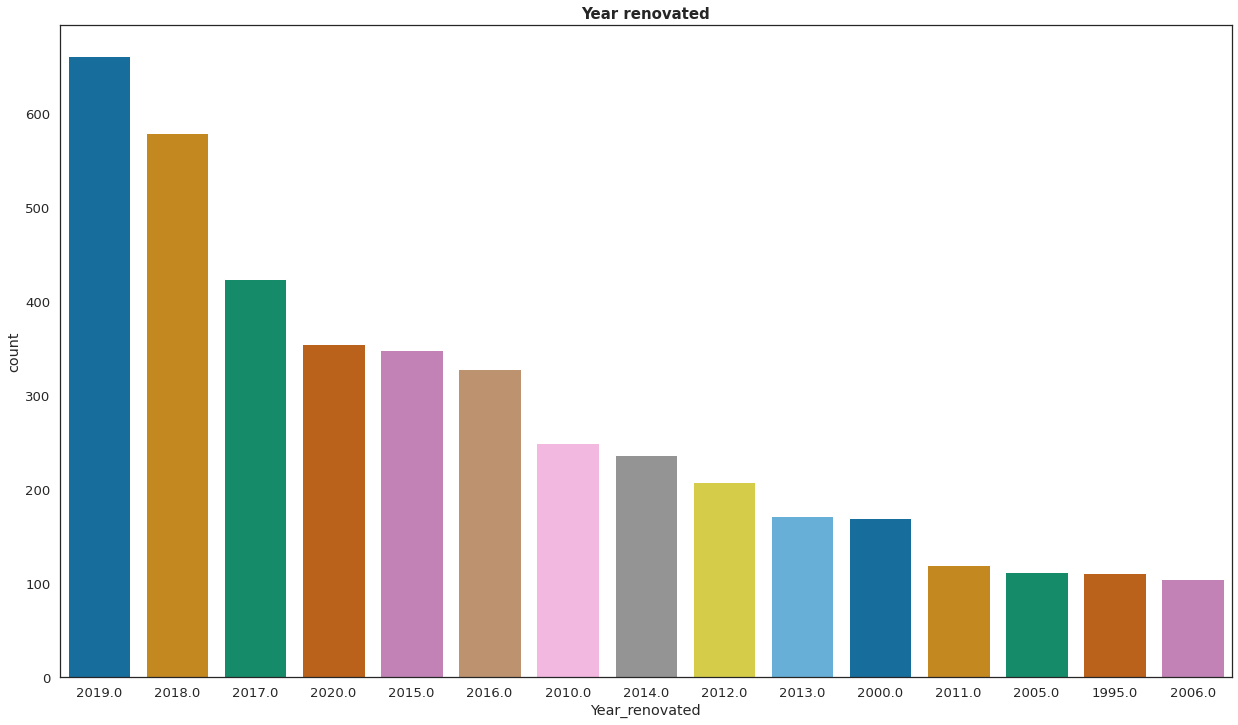

In [600]:
# plot year renovated - first 15
plt.figure(figsize=(21,12)) 
plt.title('Year renovated', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Year_renovated'], palette=colorblind_palette, order=df['Year_renovated'].value_counts().iloc[:15].index)

### Condition

<AxesSubplot:title={'center':'Condition'}, xlabel='Condition', ylabel='count'>

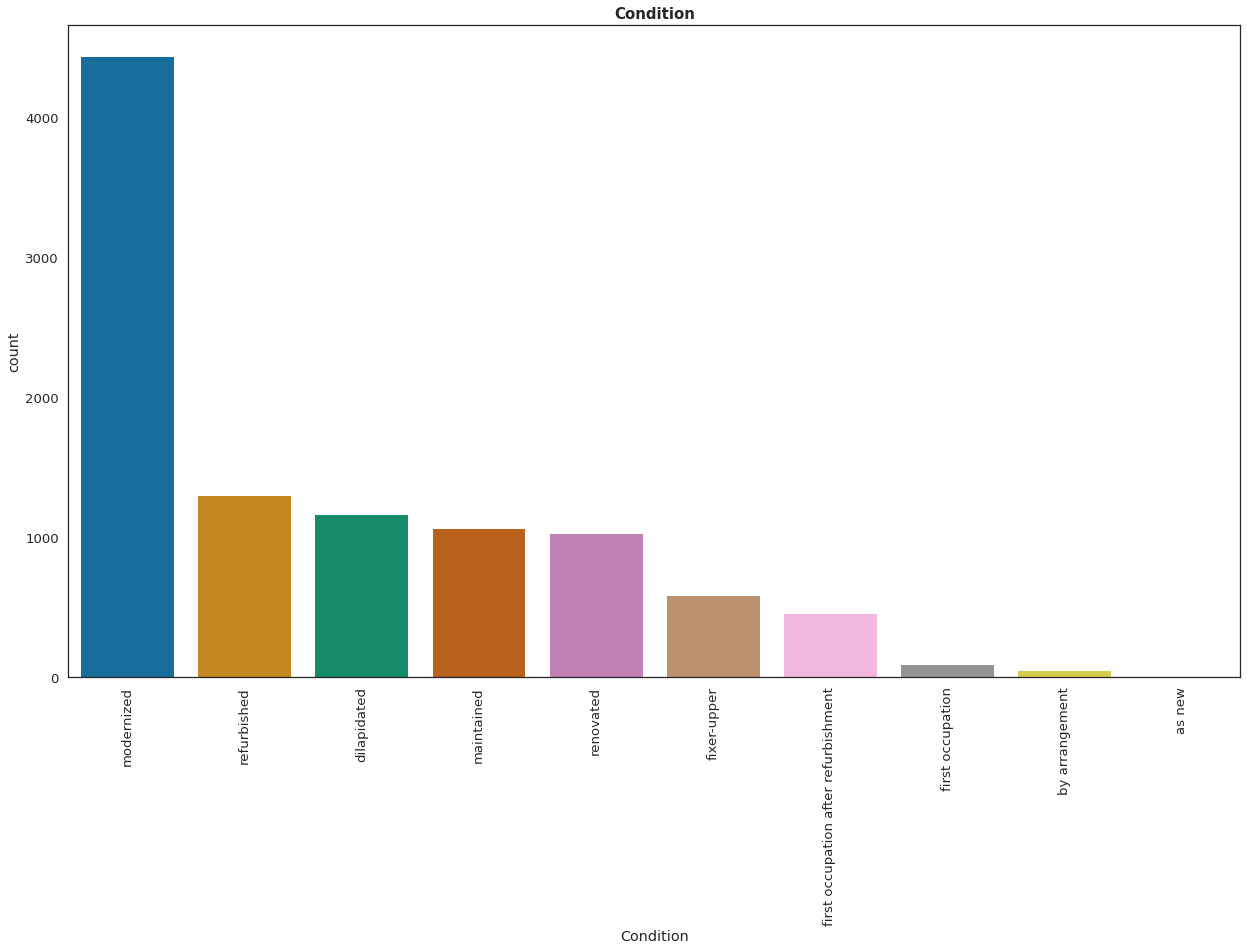

In [601]:
# plot all condition types
plt.figure(figsize=(21,12)) 
plt.title('Condition', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Condition'], data=df, palette=colorblind_palette, order=df['Condition'].value_counts().iloc[:].index)

### Heating

<AxesSubplot:title={'center':'Heating'}, xlabel='Heating', ylabel='count'>

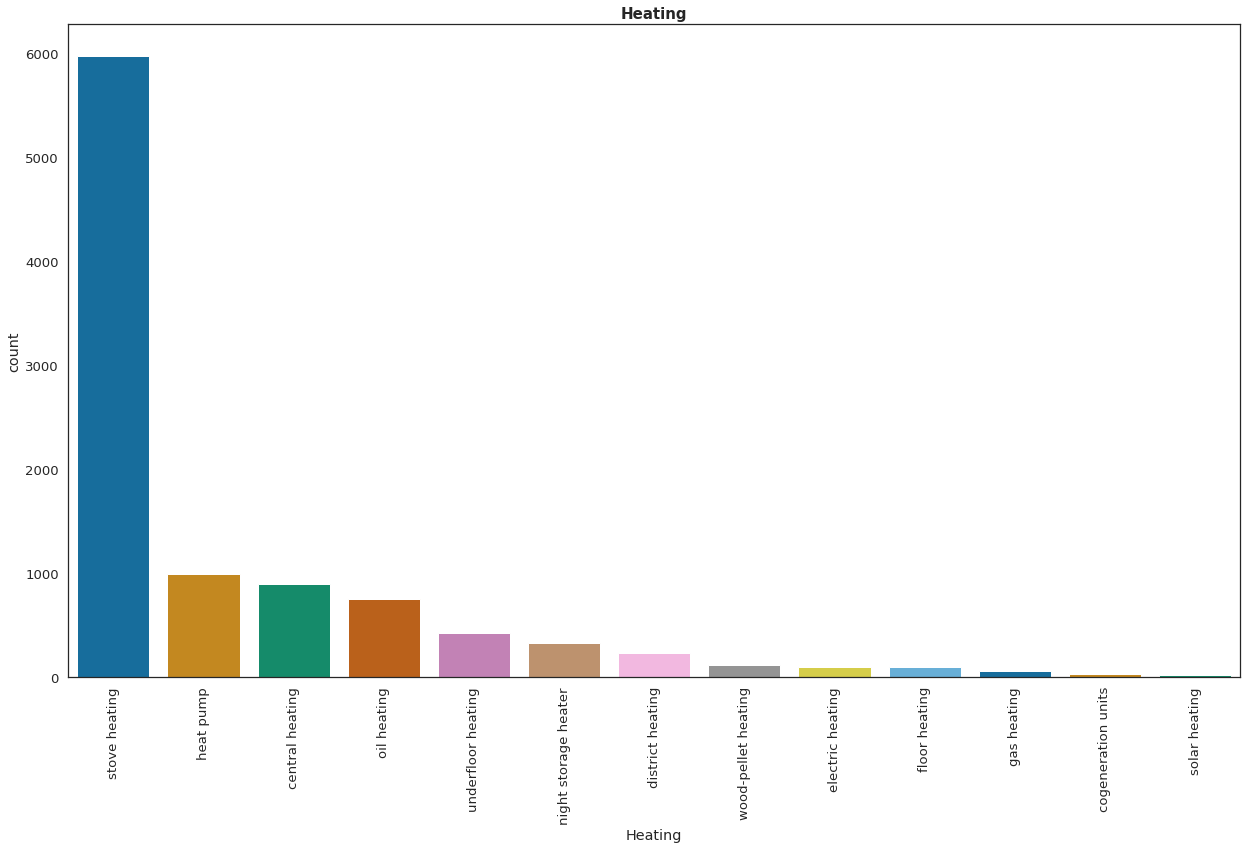

In [602]:
# plot all heating types
plt.figure(figsize=(21,12)) 
plt.title('Heating', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Heating'], data=df, palette=colorblind_palette, order=df['Heating'].value_counts().iloc[:].index)

### Energy source

<AxesSubplot:title={'center':'Energy source'}, xlabel='Energy_source', ylabel='count'>

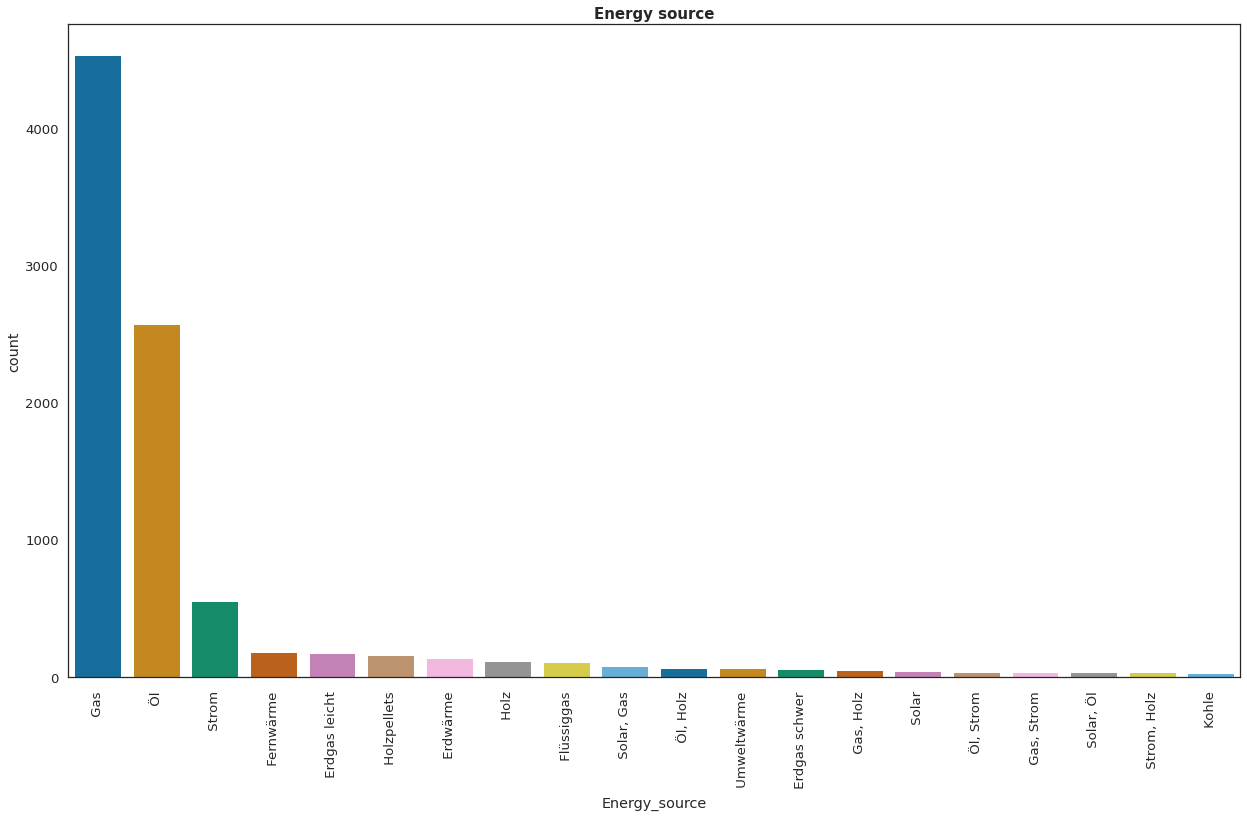

In [603]:
# plot all energy sources - first 20
plt.figure(figsize=(21,12)) 
plt.title('Energy source', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_source'], data=df, palette=colorblind_palette, order=df['Energy_source'].value_counts().iloc[:20].index)

<AxesSubplot:title={'center':'Energy source'}, xlabel='Energy_source', ylabel='count'>

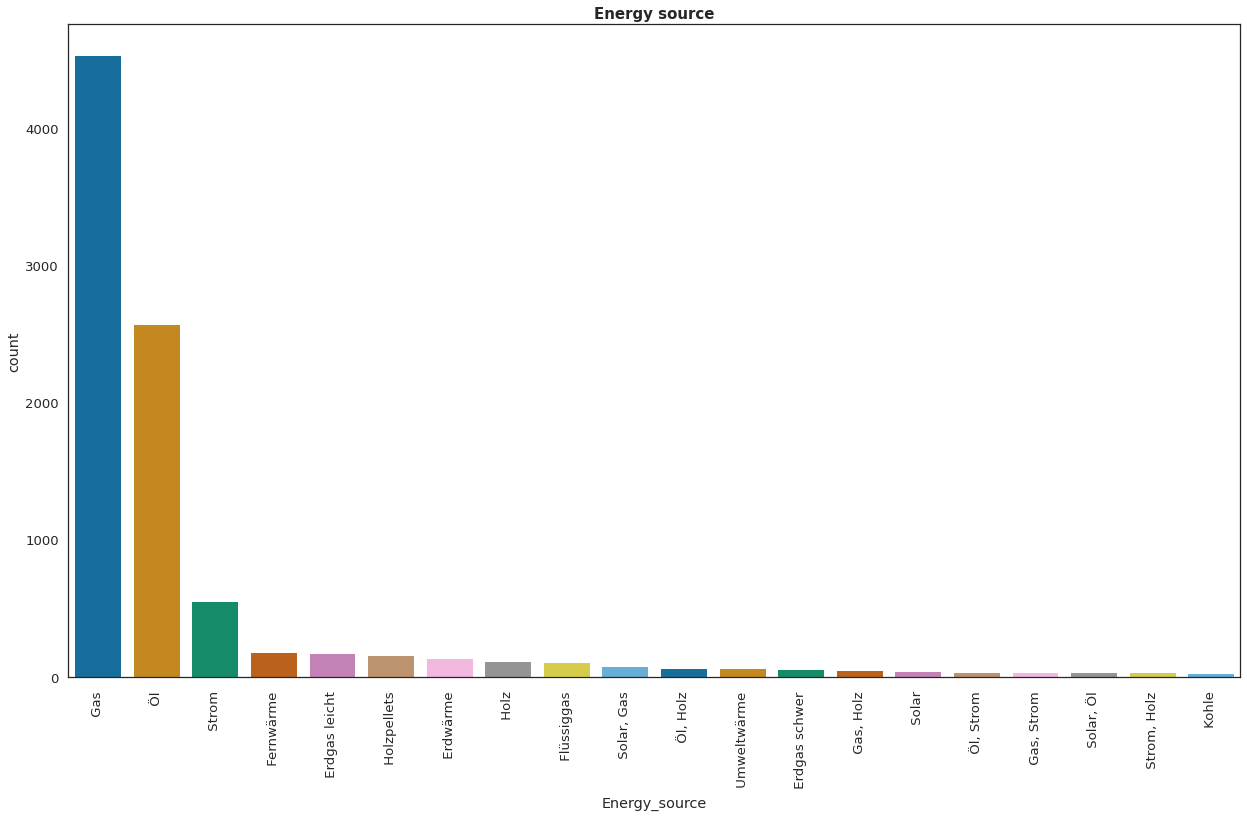

In [604]:
# plot first 20 sources
plt.figure(figsize=(21,12)) 
plt.title('Energy source', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_source'], data=df, palette=colorblind_palette, order=df['Energy_source'].value_counts().iloc[:20].index)

### Energy certificate   

<AxesSubplot:title={'center':'Energy_certificate'}, xlabel='Energy_certificate', ylabel='count'>

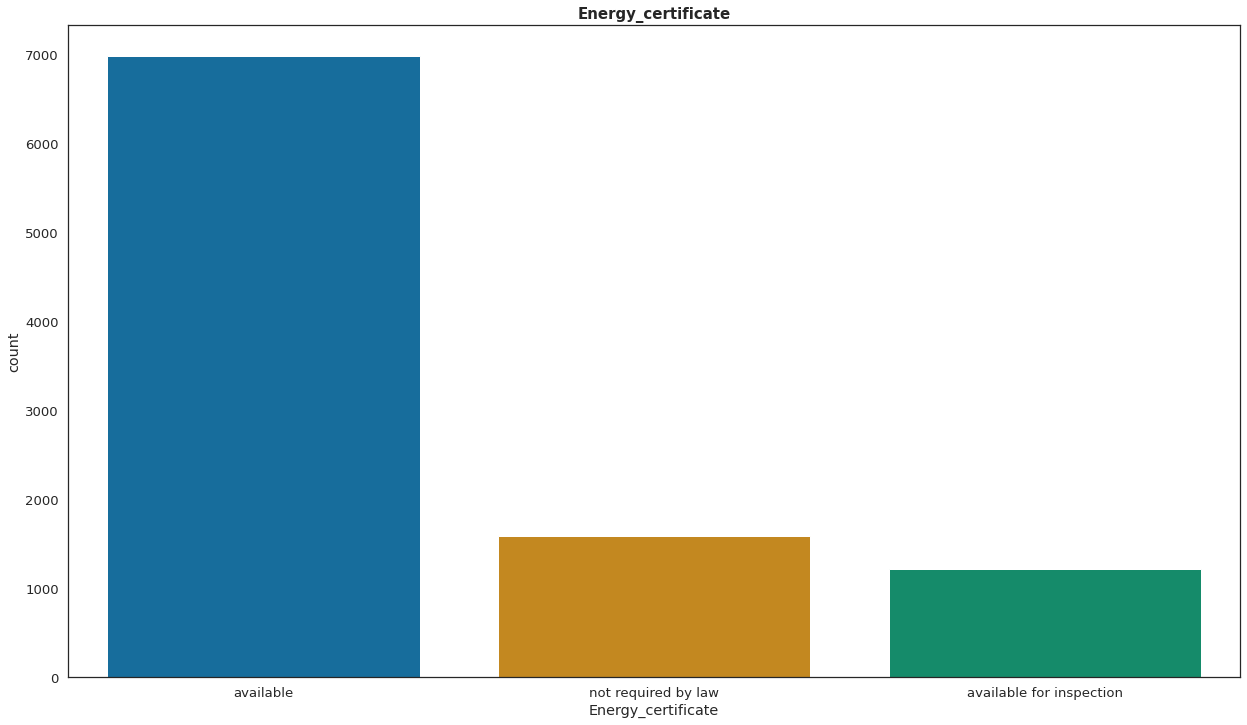

In [605]:
# plot all energy certificates
plt.figure(figsize=(21,12)) 
plt.title('Energy_certificate', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_certificate'], data=df, palette=colorblind_palette)

### Energy certificate type 

<AxesSubplot:title={'center':'Energy_certificate_type'}, xlabel='Energy_certificate_type', ylabel='count'>

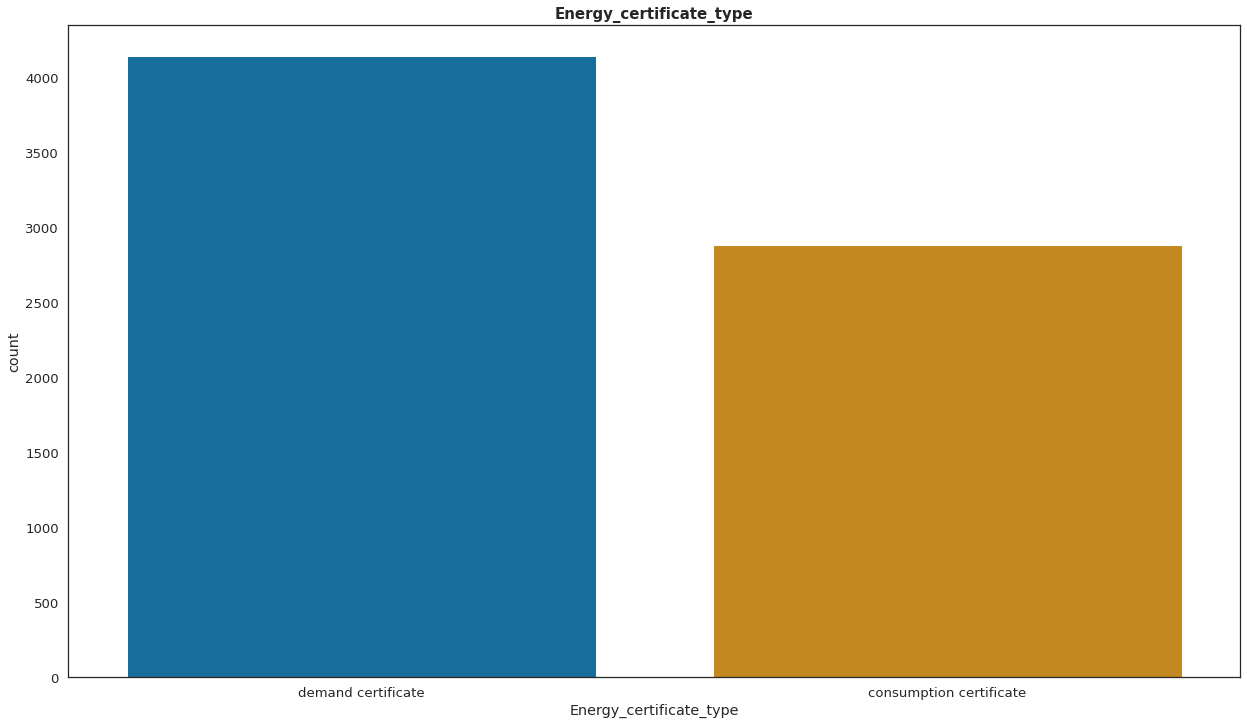

In [606]:
# plot all energy certificate types
plt.figure(figsize=(21,12)) 
plt.title('Energy_certificate_type', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_certificate_type'], data=df, palette=colorblind_palette)

### Energy_consumption

<AxesSubplot:title={'center':'Energy consumption'}, xlabel='Energy_consumption'>

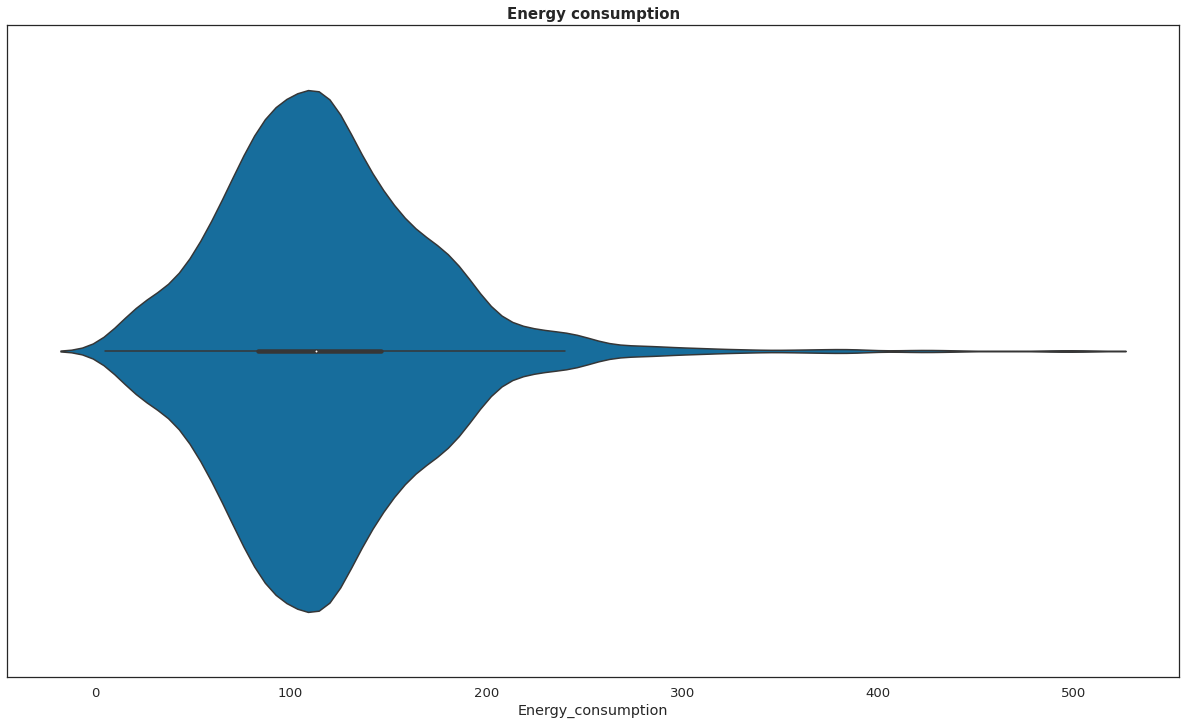

In [607]:
# plot energy consumption
plt.figure(figsize=(21,12)) 
plt.title('Energy consumption', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Energy_consumption'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Energy consumption'}, xlabel='Energy_consumption', ylabel='count'>

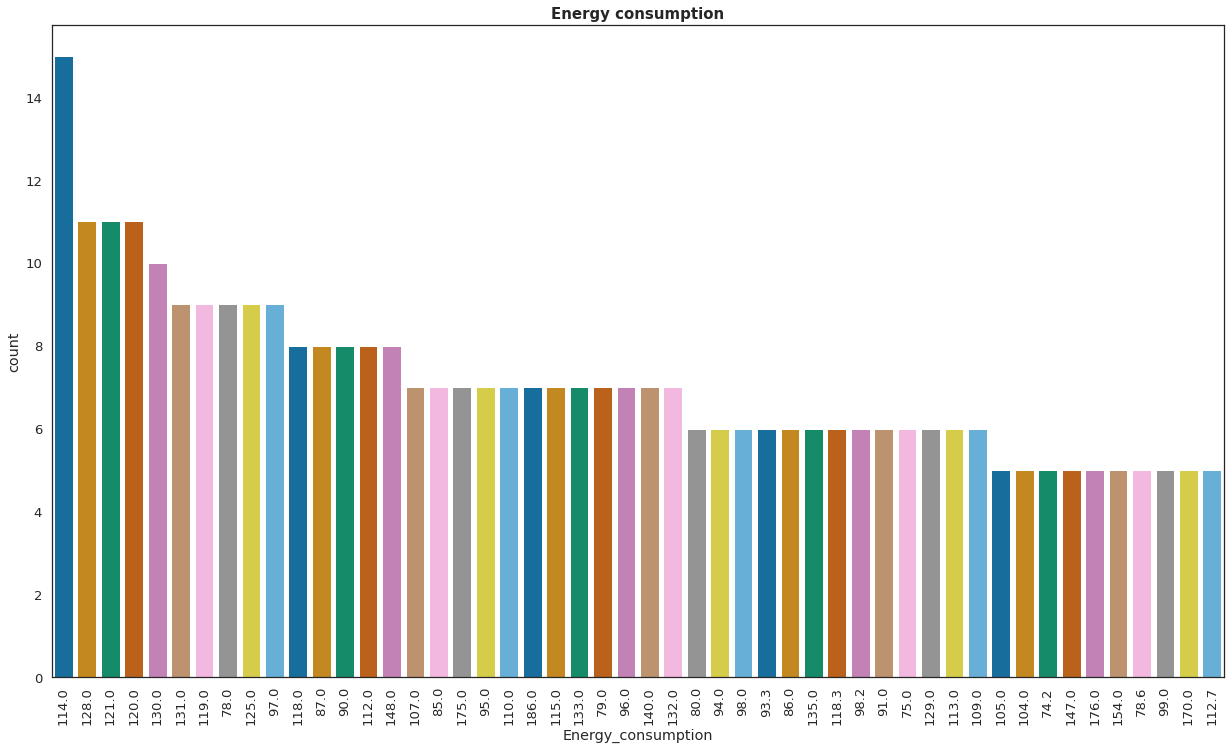

In [608]:
# plot first 20 records
plt.figure(figsize=(21,12)) 
plt.title('Energy consumption', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_consumption'], data=df, palette=colorblind_palette, order=df['Energy_consumption'].value_counts().iloc[:50].index)

### Energy efficiency class

<AxesSubplot:title={'center':'Energy efficiency class'}, xlabel='Energy_efficiency_class', ylabel='count'>

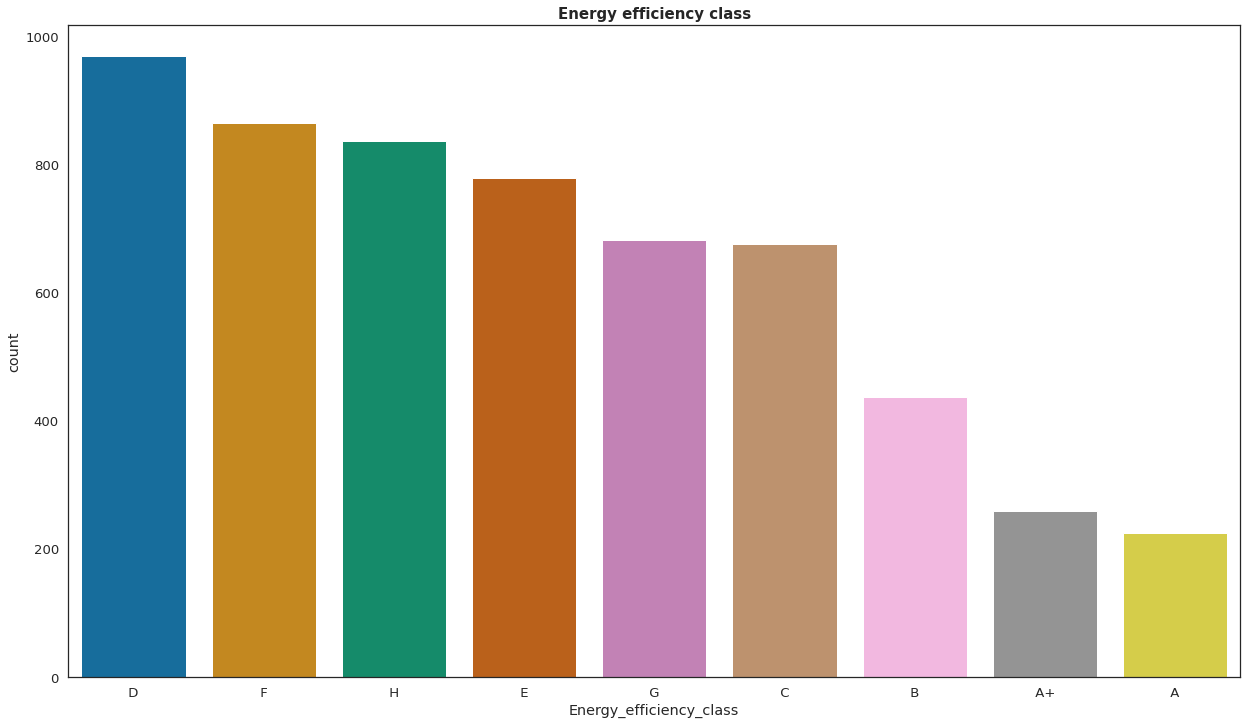

In [609]:
# plot all energy efficience classes
plt.figure(figsize=(21,12)) 
plt.title('Energy efficiency class', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_efficiency_class'], data=df, palette=colorblind_palette, order=df['Energy_efficiency_class'].value_counts().iloc[:].index)

### State                       

<AxesSubplot:title={'center':'State'}, xlabel='State', ylabel='count'>

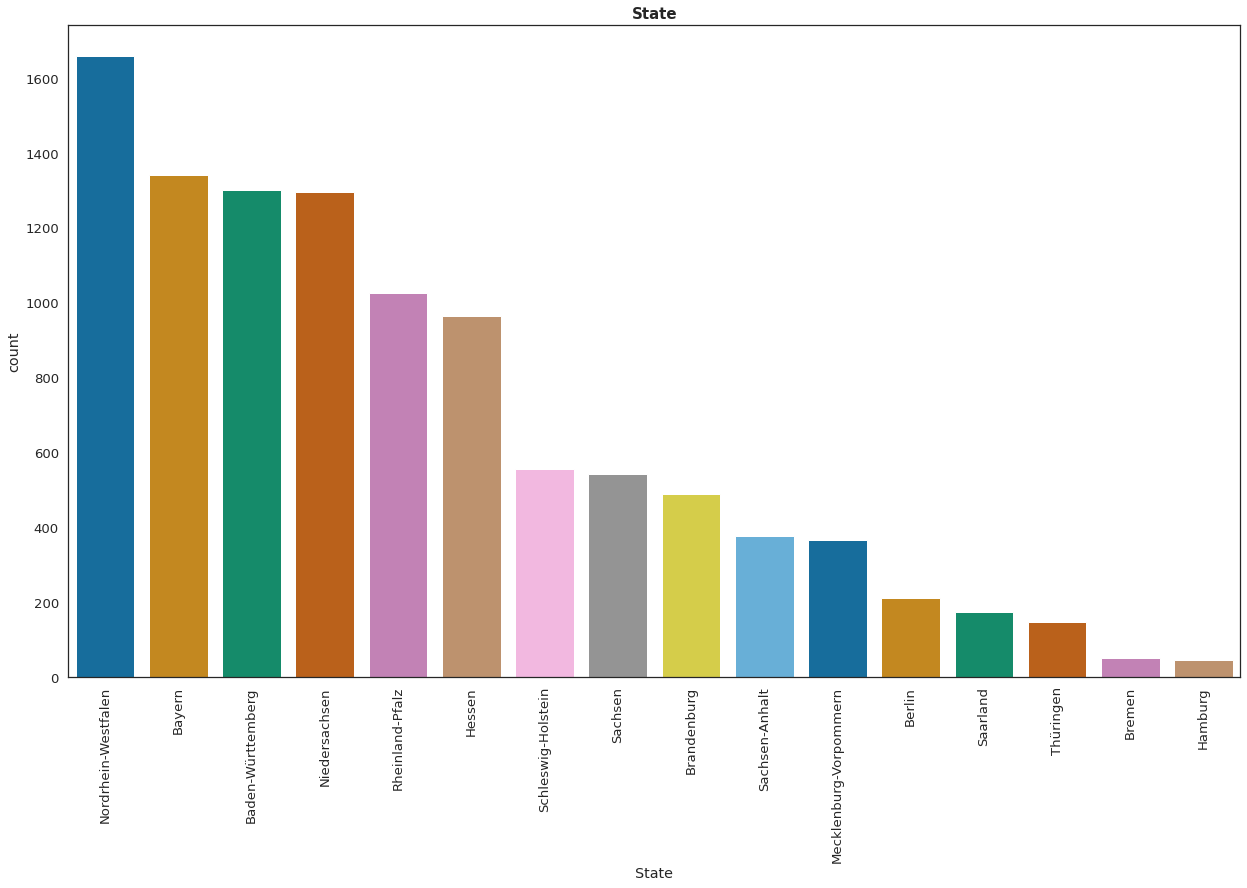

In [610]:
# plot all energy certificate types
plt.figure(figsize=(21,12)) 
plt.title('State', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['State'], data=df, palette=colorblind_palette, order=df['State'].value_counts().iloc[:].index)

### City                     

<AxesSubplot:title={'center':'City'}, xlabel='City', ylabel='count'>

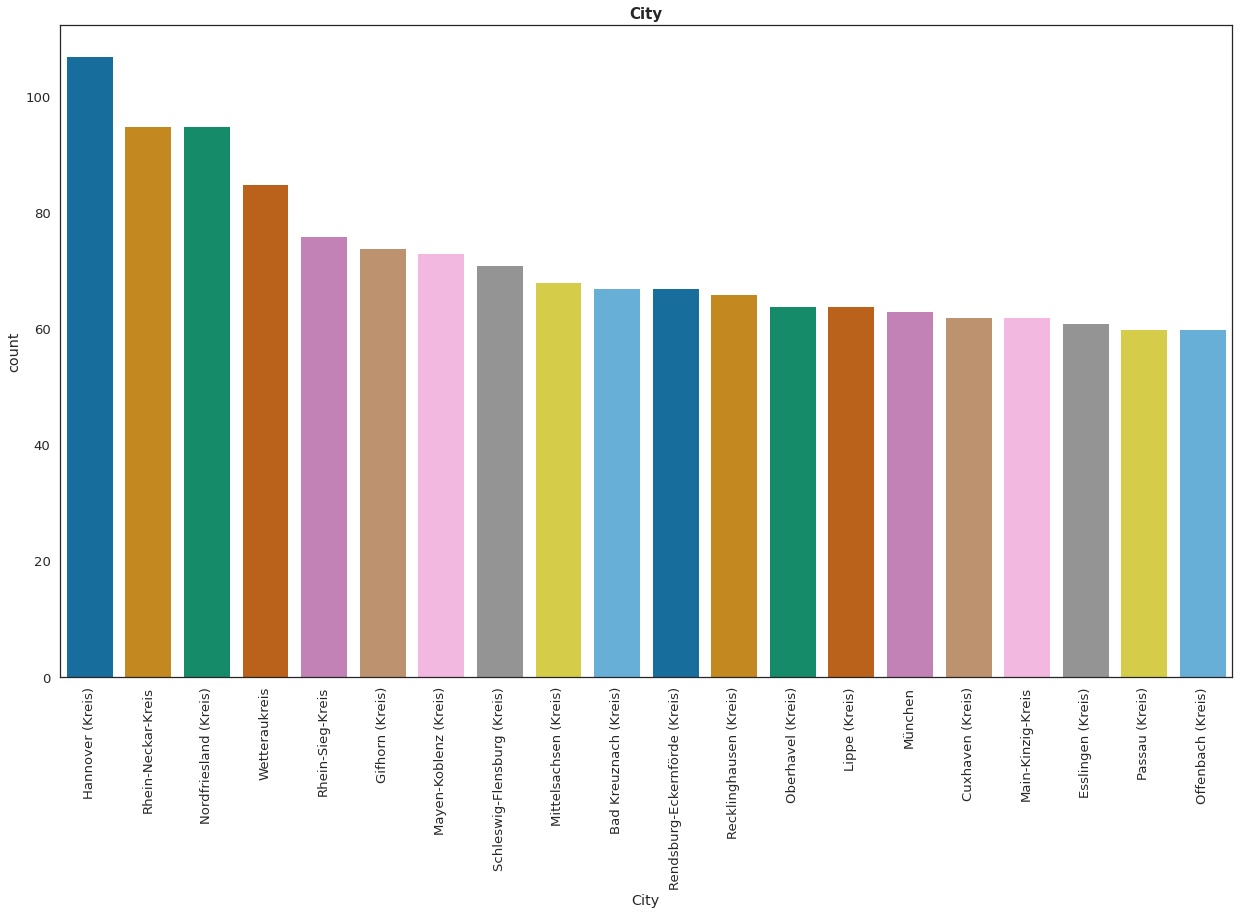

In [611]:
# plot first 20 cites
plt.figure(figsize=(21,12)) 
plt.title('City', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['City'], data=df, palette=colorblind_palette, order=df['City'].value_counts().iloc[:20].index)

### Place

<AxesSubplot:title={'center':'Place'}, xlabel='Place', ylabel='count'>

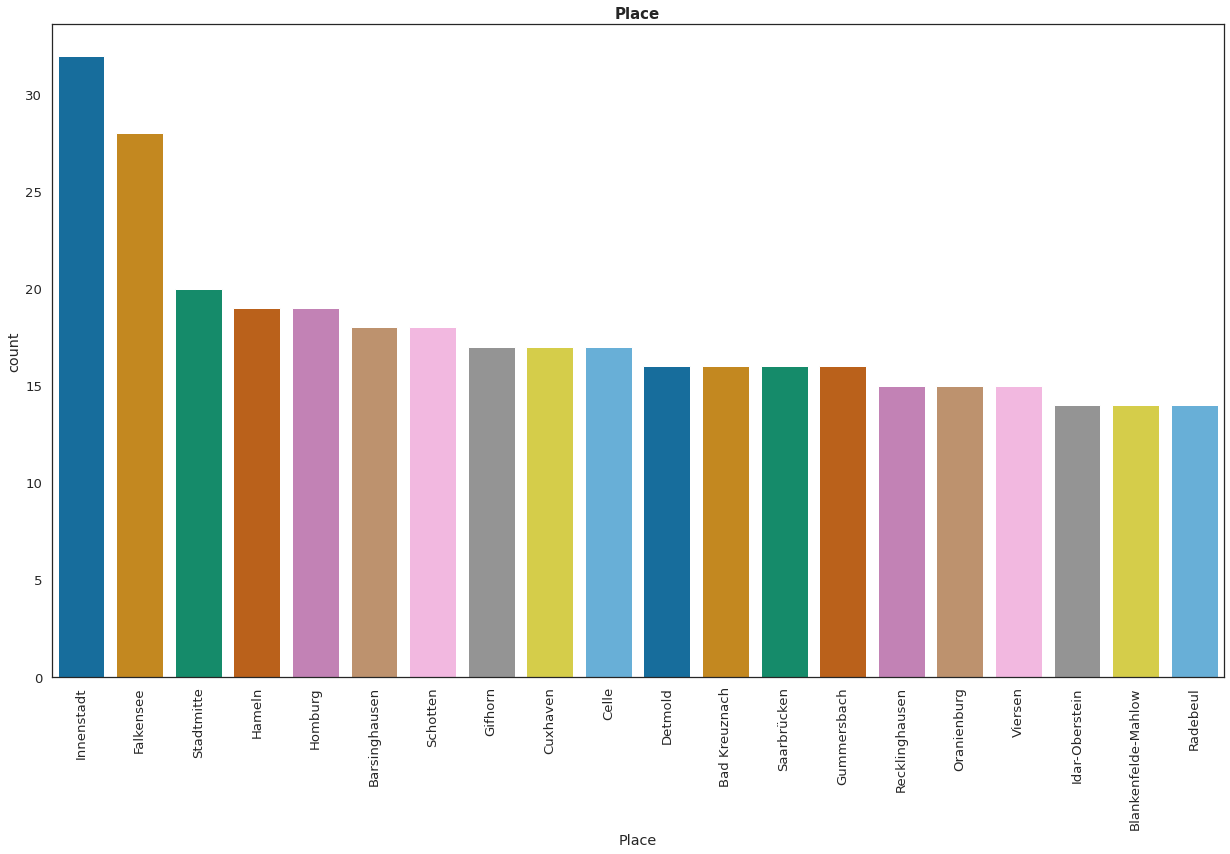

In [612]:
# plot first 20 places
plt.figure(figsize=(21,12)) 
plt.title('Place', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Place'], data=df, palette=colorblind_palette, order=df['Place'].value_counts().iloc[:20].index)

### Garages

<AxesSubplot:title={'center':'Garages'}, xlabel='Garages', ylabel='count'>

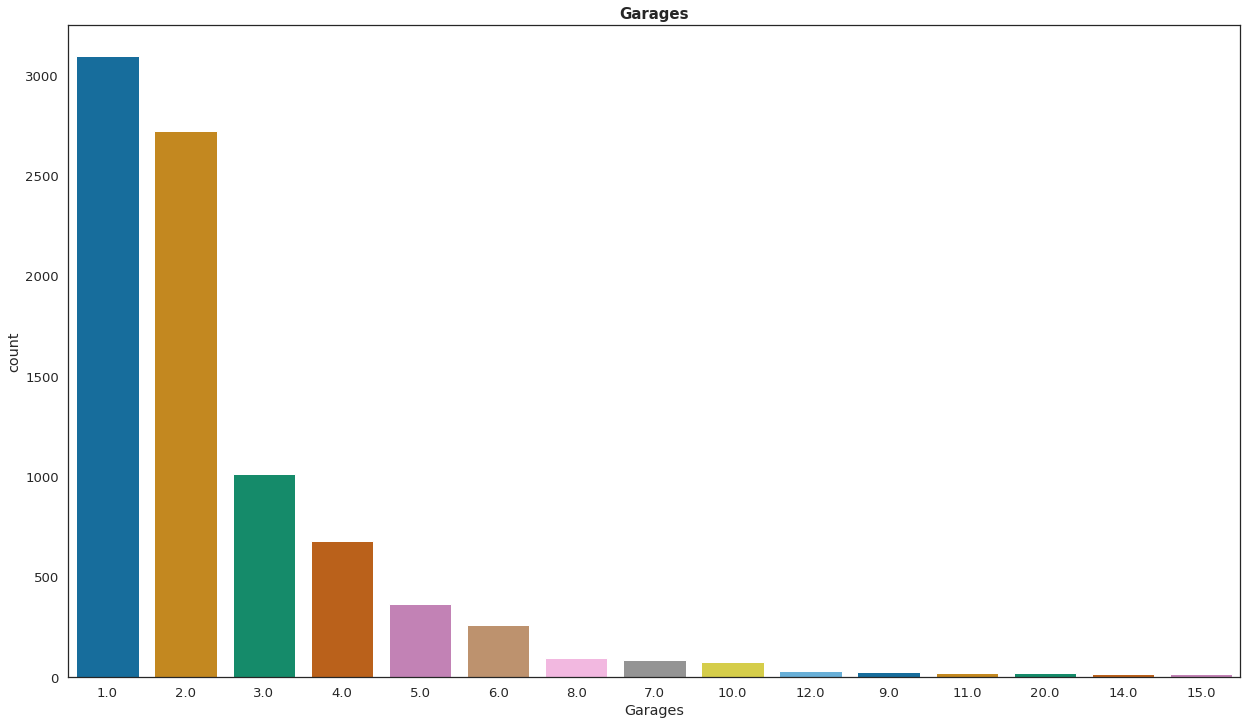

In [613]:
# plot first 15 records
plt.figure(figsize=(21,12)) 
plt.title('Garages', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Garages'], data=df, palette=colorblind_palette, order=df['Garages'].value_counts().iloc[:15].index)

### Garagetype      

<AxesSubplot:title={'center':'Garagetype'}, xlabel='Garagetype', ylabel='count'>

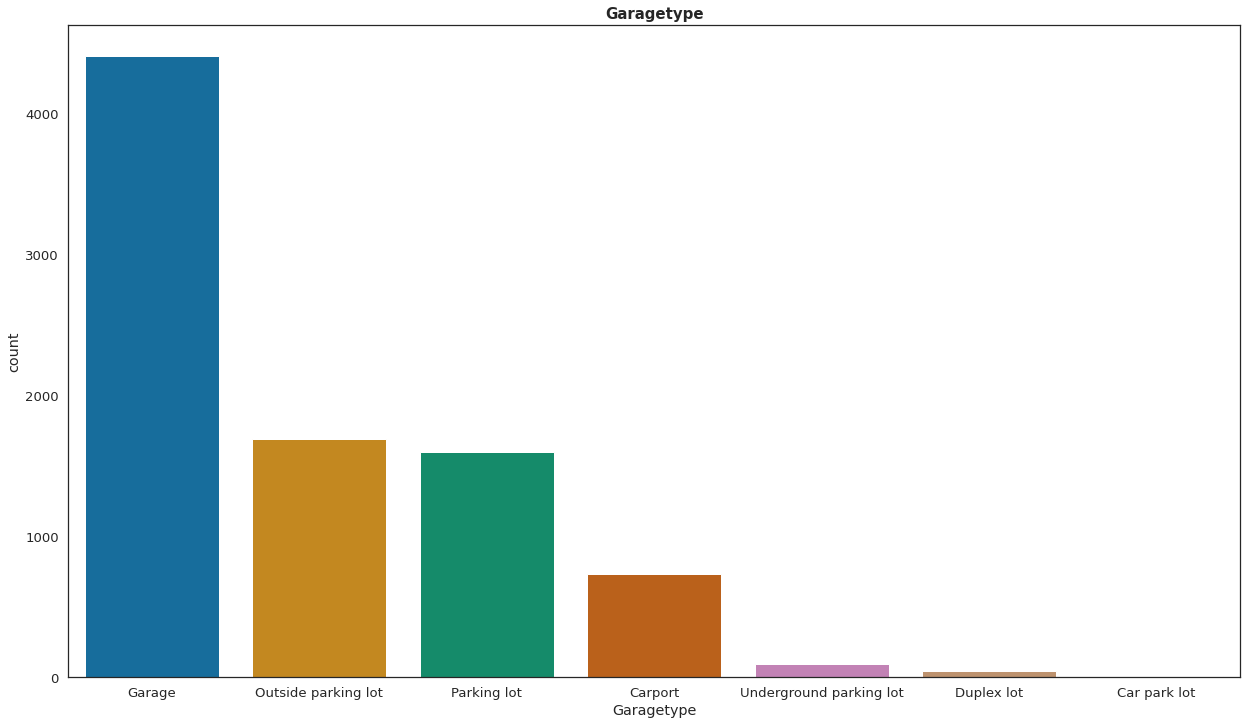

In [614]:
# plot first 20 garage types
plt.figure(figsize=(21,12)) 
plt.title('Garagetype', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Garagetype'], data=df, palette=colorblind_palette, order=df['Garagetype'].value_counts().iloc[:].index)

## Analytical questions

### What does influence the most property prices?

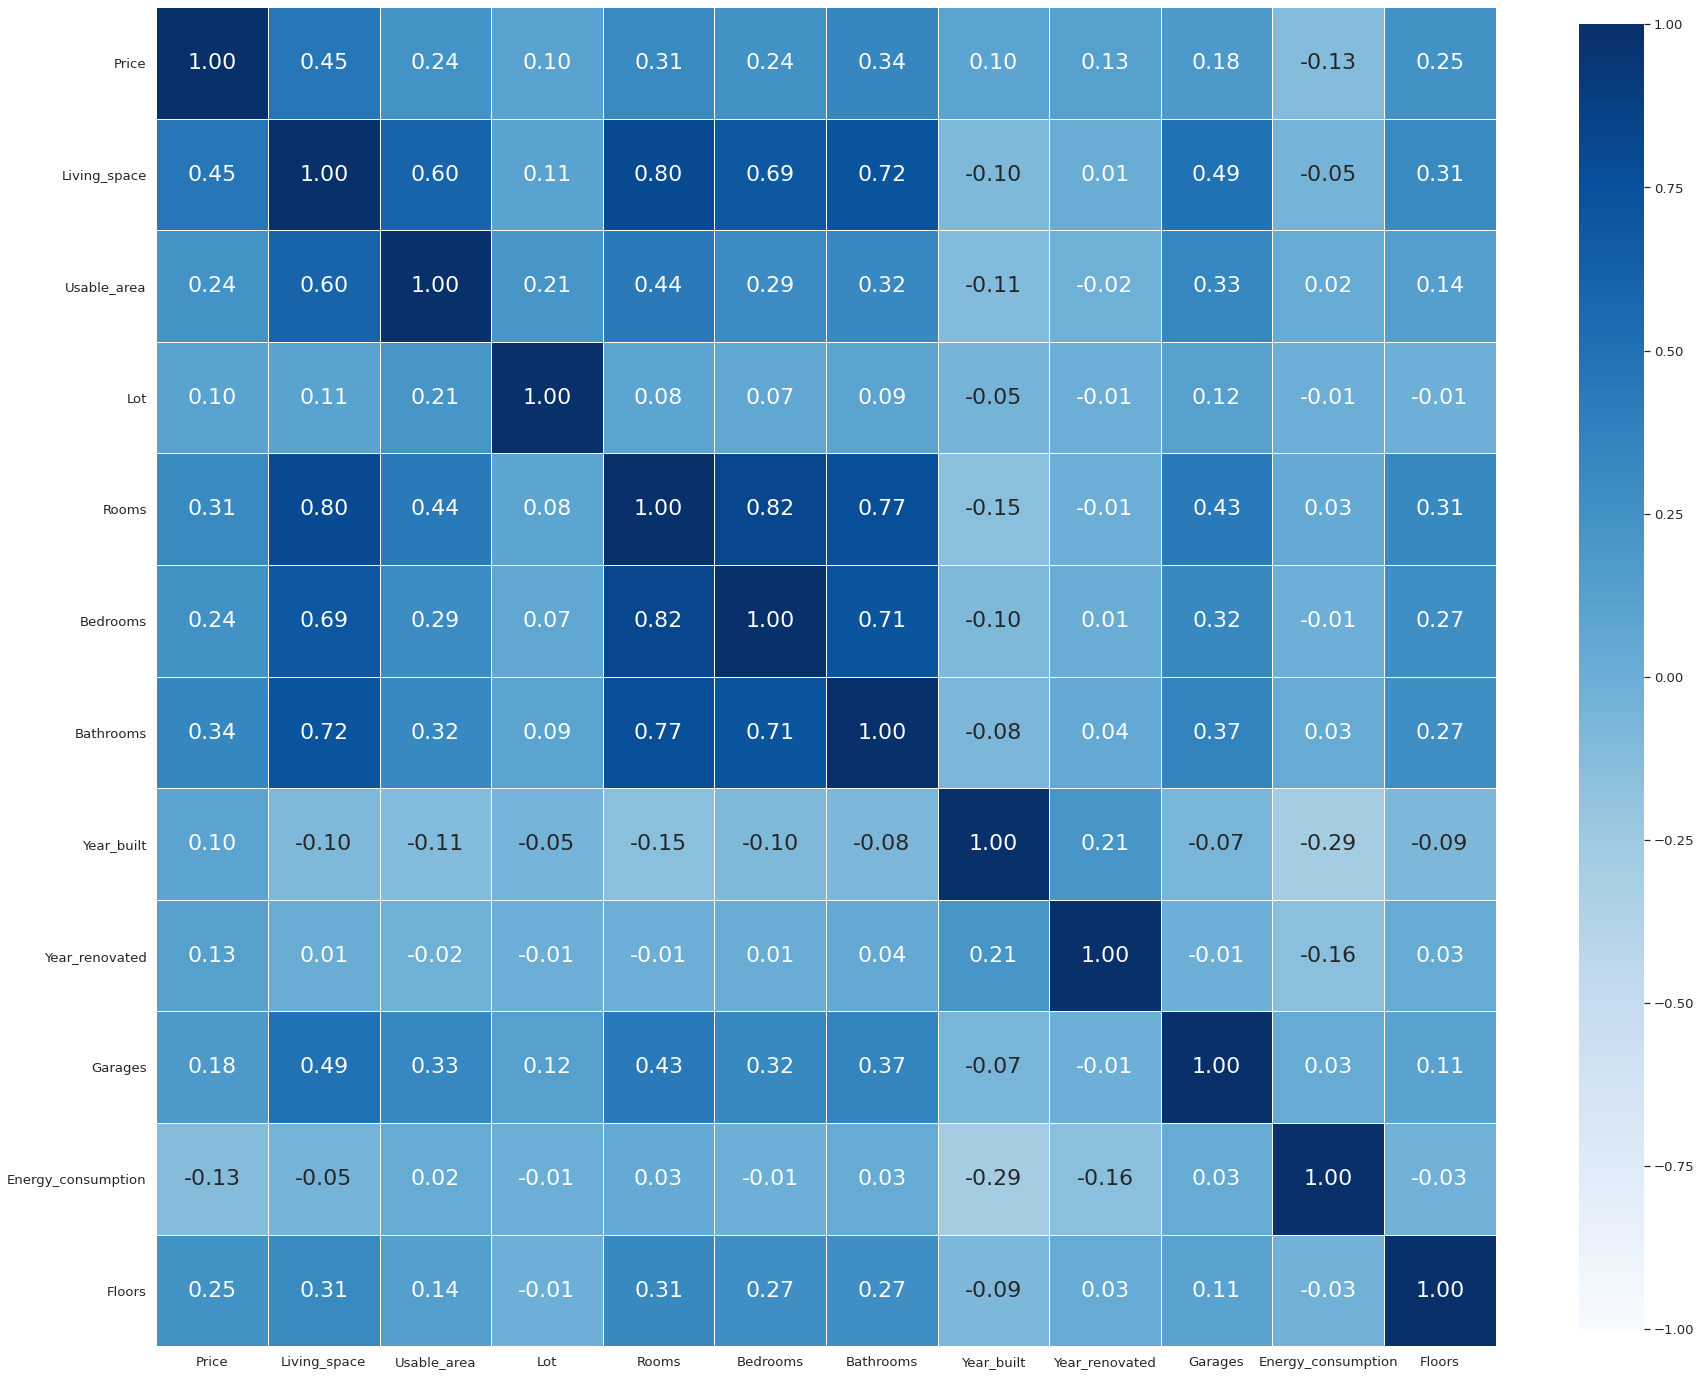

In [615]:
# plot heatmap
fig, ax = plt.subplots(figsize=(30, 30))
corr_data = df[['Price', 'Living_space', 'Usable_area', 'Lot', 'Rooms', 'Bedrooms', 'Bathrooms', 'Year_built', 'Year_renovated', 'Garages', 'Energy_consumption', 'Floors']].copy()
correlations = corr_data.corr() 
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8}, linewidths=.7, annot_kws={'fontsize':22})
plt.show()

In [616]:
# select high price
high_price_flat = df.groupby(price_ed.high)
high_price_flat()

AttributeError: 'Series' object has no attribute 'high'

In [ ]:
# see relationship between living space and price 